In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math

In [4]:
pip install import_ipynb

Defaulting to user installation because normal site-packages is not writeable
Looking in links: /usr/share/pip-wheels
Note: you may need to restart the kernel to use updated packages.


In [5]:
pip install yfinance

Defaulting to user installation because normal site-packages is not writeable
Looking in links: /usr/share/pip-wheels
Note: you may need to restart the kernel to use updated packages.


In [6]:
import pandas as pd
import pandas_datareader.data as web
import yfinance as yf
import datetime
import random as r

1. Generate a sample of 100 observations drawn from a normal distribution with mean of 2 and standard deviation of .5. Plot the result using a histogram.

In [8]:
mean = 2
std_dev = 0.5
sample = np.random.normal(mean, std_dev, 100)

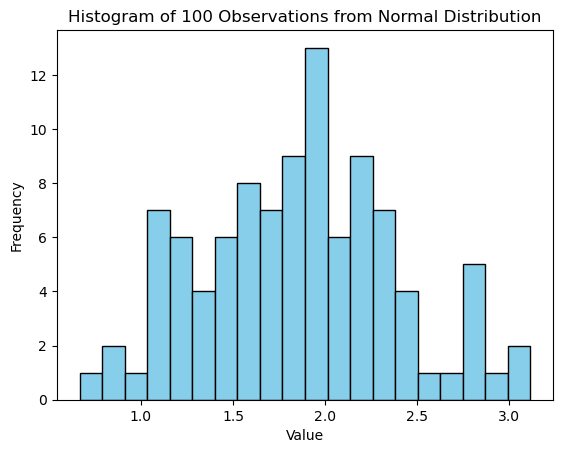

In [9]:
plt.hist(sample, bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram of 100 Observations from Normal Distribution')
plt.show()

2. Create a cumulative sum from the values created in the previous exercise. Plot the result. Does the data appear to follow a trend? Explain.

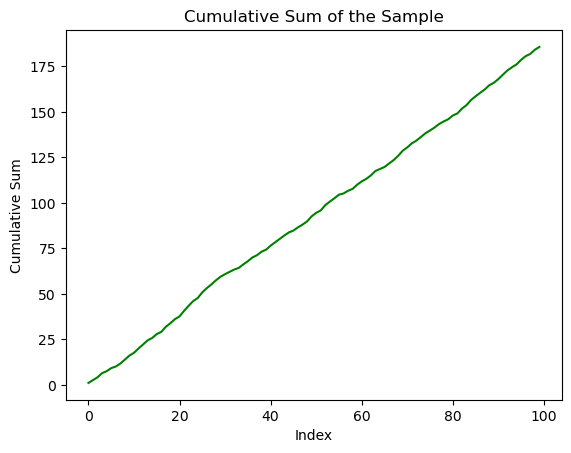

In [11]:
cumulative_sum = np.cumsum(sample)

# Plot the cumulative sum
plt.plot(cumulative_sum, color='green')
plt.xlabel('Index')
plt.ylabel('Cumulative Sum')
plt.title('Cumulative Sum of the Sample')
plt.show()

The data appears to follow a positive trend with each summation of the observations from the sample variable. This is becuase all of the values from the sample variable are strictly positive, therefore, the plot of the cumulative sum is always increasing. The slope of cumulative sum curve is just over 2, hence, at index 50, the cumulative sum is around 100.   

3. Choose 4 stocks of your choice and create a notebook with the same visualizations. Provide similar explanations in regard to the meaning of statistics and the shape of each stocks distribution.

In [14]:
yf.pdr_override()
start = datetime.datetime(2012, 1, 1)
end = datetime.datetime.today()

data_dict = {}
stocks = ["PEP", "KO", "BA", "NOC"]
for key in stocks:
    data_dict[key] = web.get_data_yahoo(key, start, end)
#PEP is PepsiCo
#KO is Coca-Cola
#BA is Boeing 
#NOC is Northtrop Grumman 

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [15]:
data_dict["PEP"]

Open        High         Low       Close   Adj Close  \
Date                                                                     
2012-01-03   66.860001   67.190002   66.360001   66.400002   46.588123   
2012-01-04   66.410004   66.839996   66.120003   66.739998   46.826683   
2012-01-05   66.580002   66.669998   66.120003   66.220001   46.461830   
2012-01-06   66.269997   66.269997   65.290001   65.389999   45.879486   
2012-01-09   65.260002   65.830002   65.010002   65.730003   46.118034   
...                ...         ...         ...         ...         ...   
2024-03-14  166.259995  166.259995  164.199997  164.779999  164.779999   
2024-03-15  165.059998  165.380005  163.639999  164.660004  164.660004   
2024-03-18  167.050003  172.179993  166.949997  171.259995  171.259995   
2024-03-19  171.100006  172.649994  171.000000  171.800003  171.800003   
2024-03-20  172.300003  173.100006  171.119995  171.860001  171.860001   

              Volume  
Date                  
2012-01-03   5348800  
2012-01-04   6042400  
2012-01-05   4909100  
2012-01-06   6533000  
2012-01-09   5859600  
...              ...  
2024-03-14   5155300  
2024-03-15  21881200  
2024-03-18  10478500  
2024-03-19   7653700  
2024-03-20   5046700  

[3073 rows x 6 columns]

In [16]:
close_data = pd.concat([val["Close"] for val in data_dict.values()], 
                       keys = data_dict.keys(), 
                       axis = 1)
close_data.head()

PEP         KO         BA        NOC
Date                                                  
2012-01-03  66.400002  35.070000  74.220001  58.660000
2012-01-04  66.739998  34.849998  74.330002  58.630001
2012-01-05  66.220001  34.685001  73.529999  58.150002
2012-01-06  65.389999  34.465000  73.980003  57.900002
2012-01-09  65.730003  34.465000  74.529999  57.910000

/tmp/ipykernel_121/3696588193.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([int(y) if y >= 1 else round(y,1) for y in y_vals])


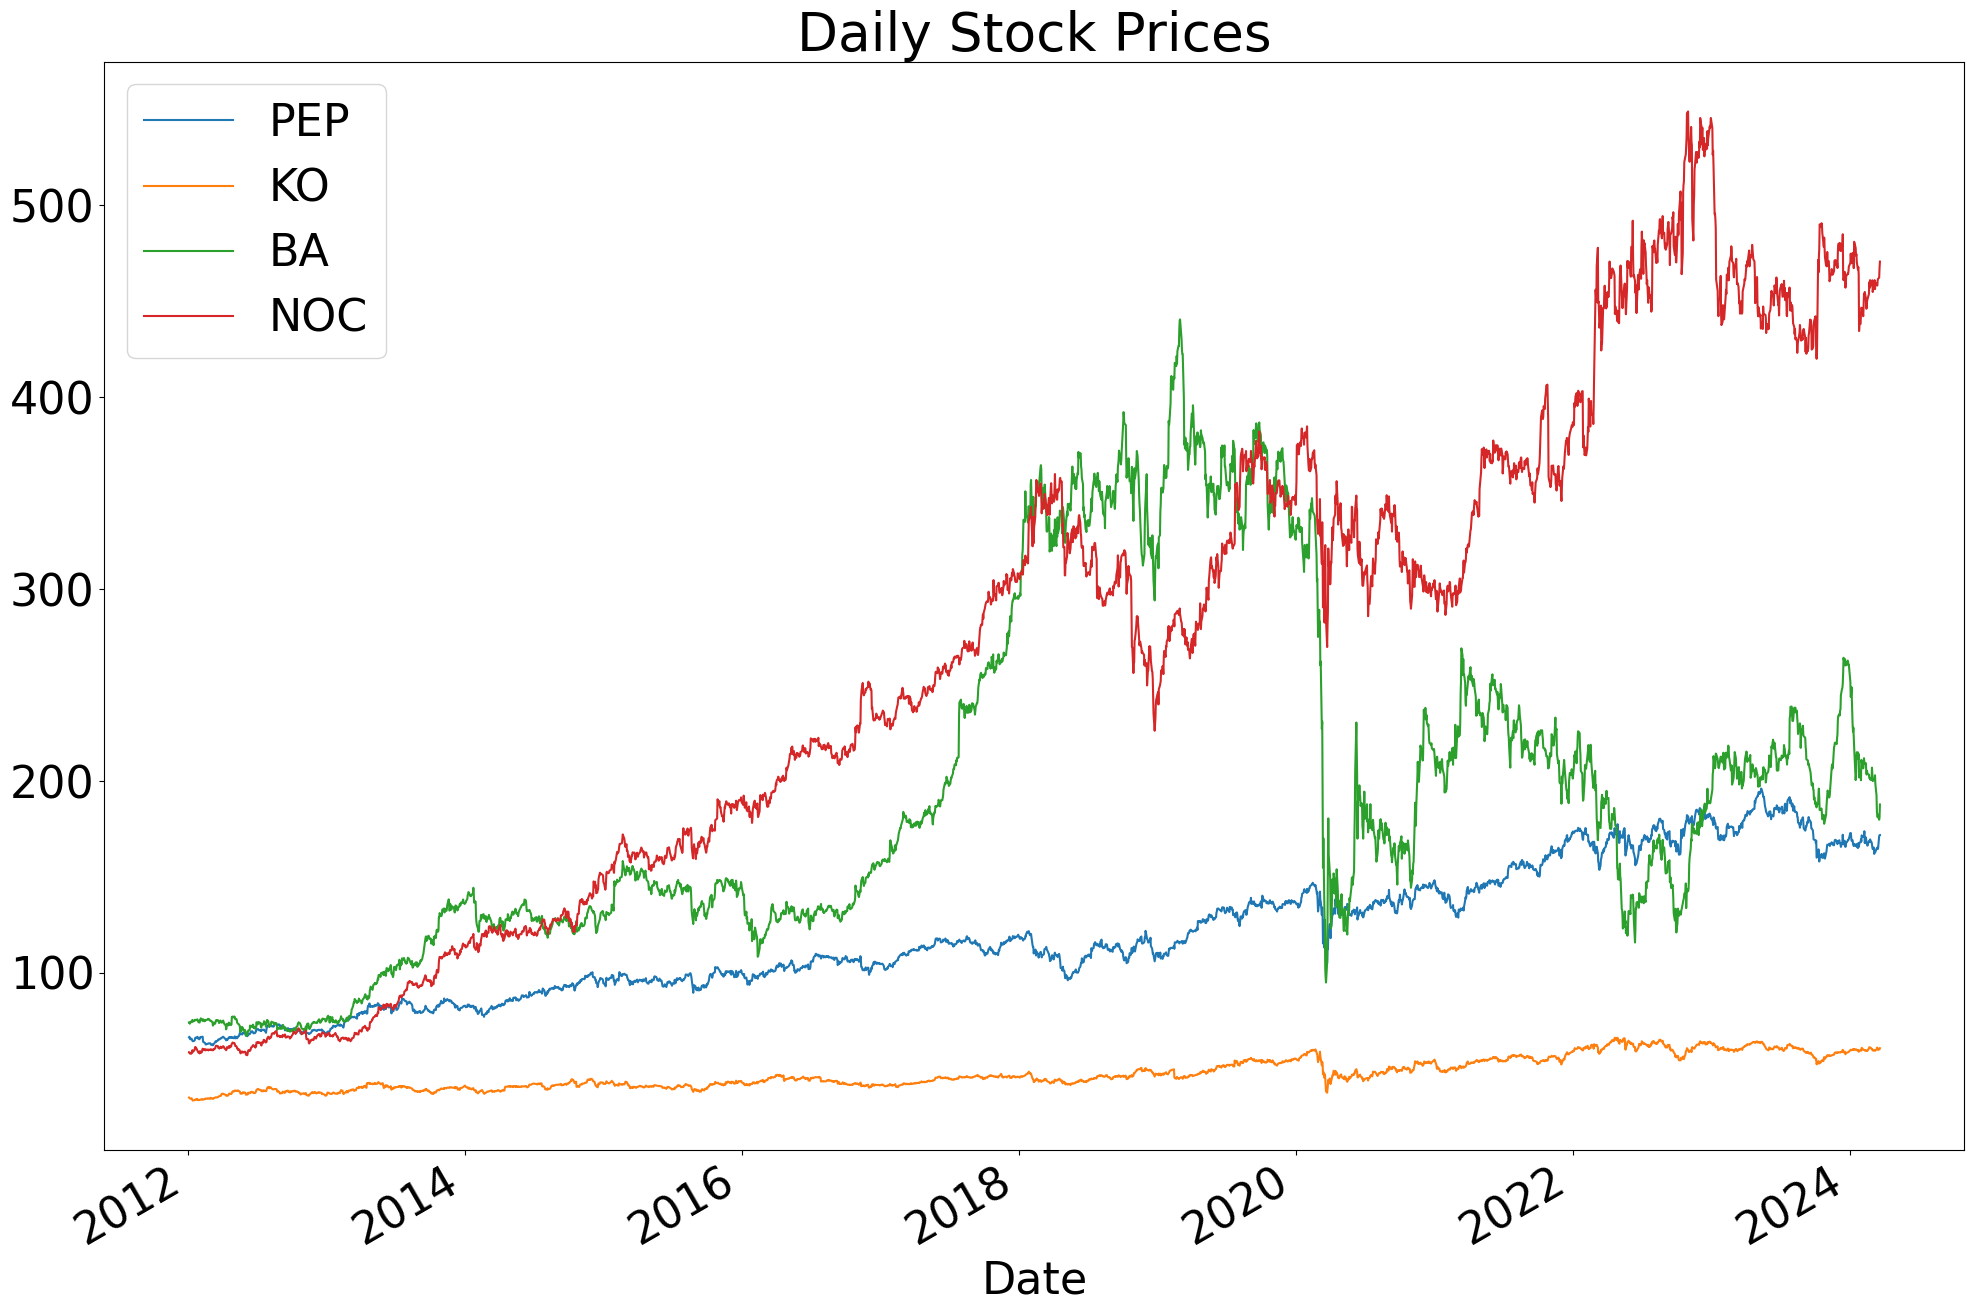

In [17]:
import matplotlib.pyplot as plt

# set default font size
plt.rcParams.update({'font.size': 32})
fig, ax = plt.subplots(figsize = (24,16))
close_data.plot.line(ax = ax, legend = True)
# reset y labels to integer from scientific notation
y_vals = ax.get_yticks()
ax.set_yticklabels([int(y) if y >= 1 else round(y,1) for y in y_vals])    

plt.title("Daily Stock Prices")
plt.show()
plt.close()

/tmp/ipykernel_121/2745510779.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([int(y) if y >= 1 else round(y,1) for y in y_vals])


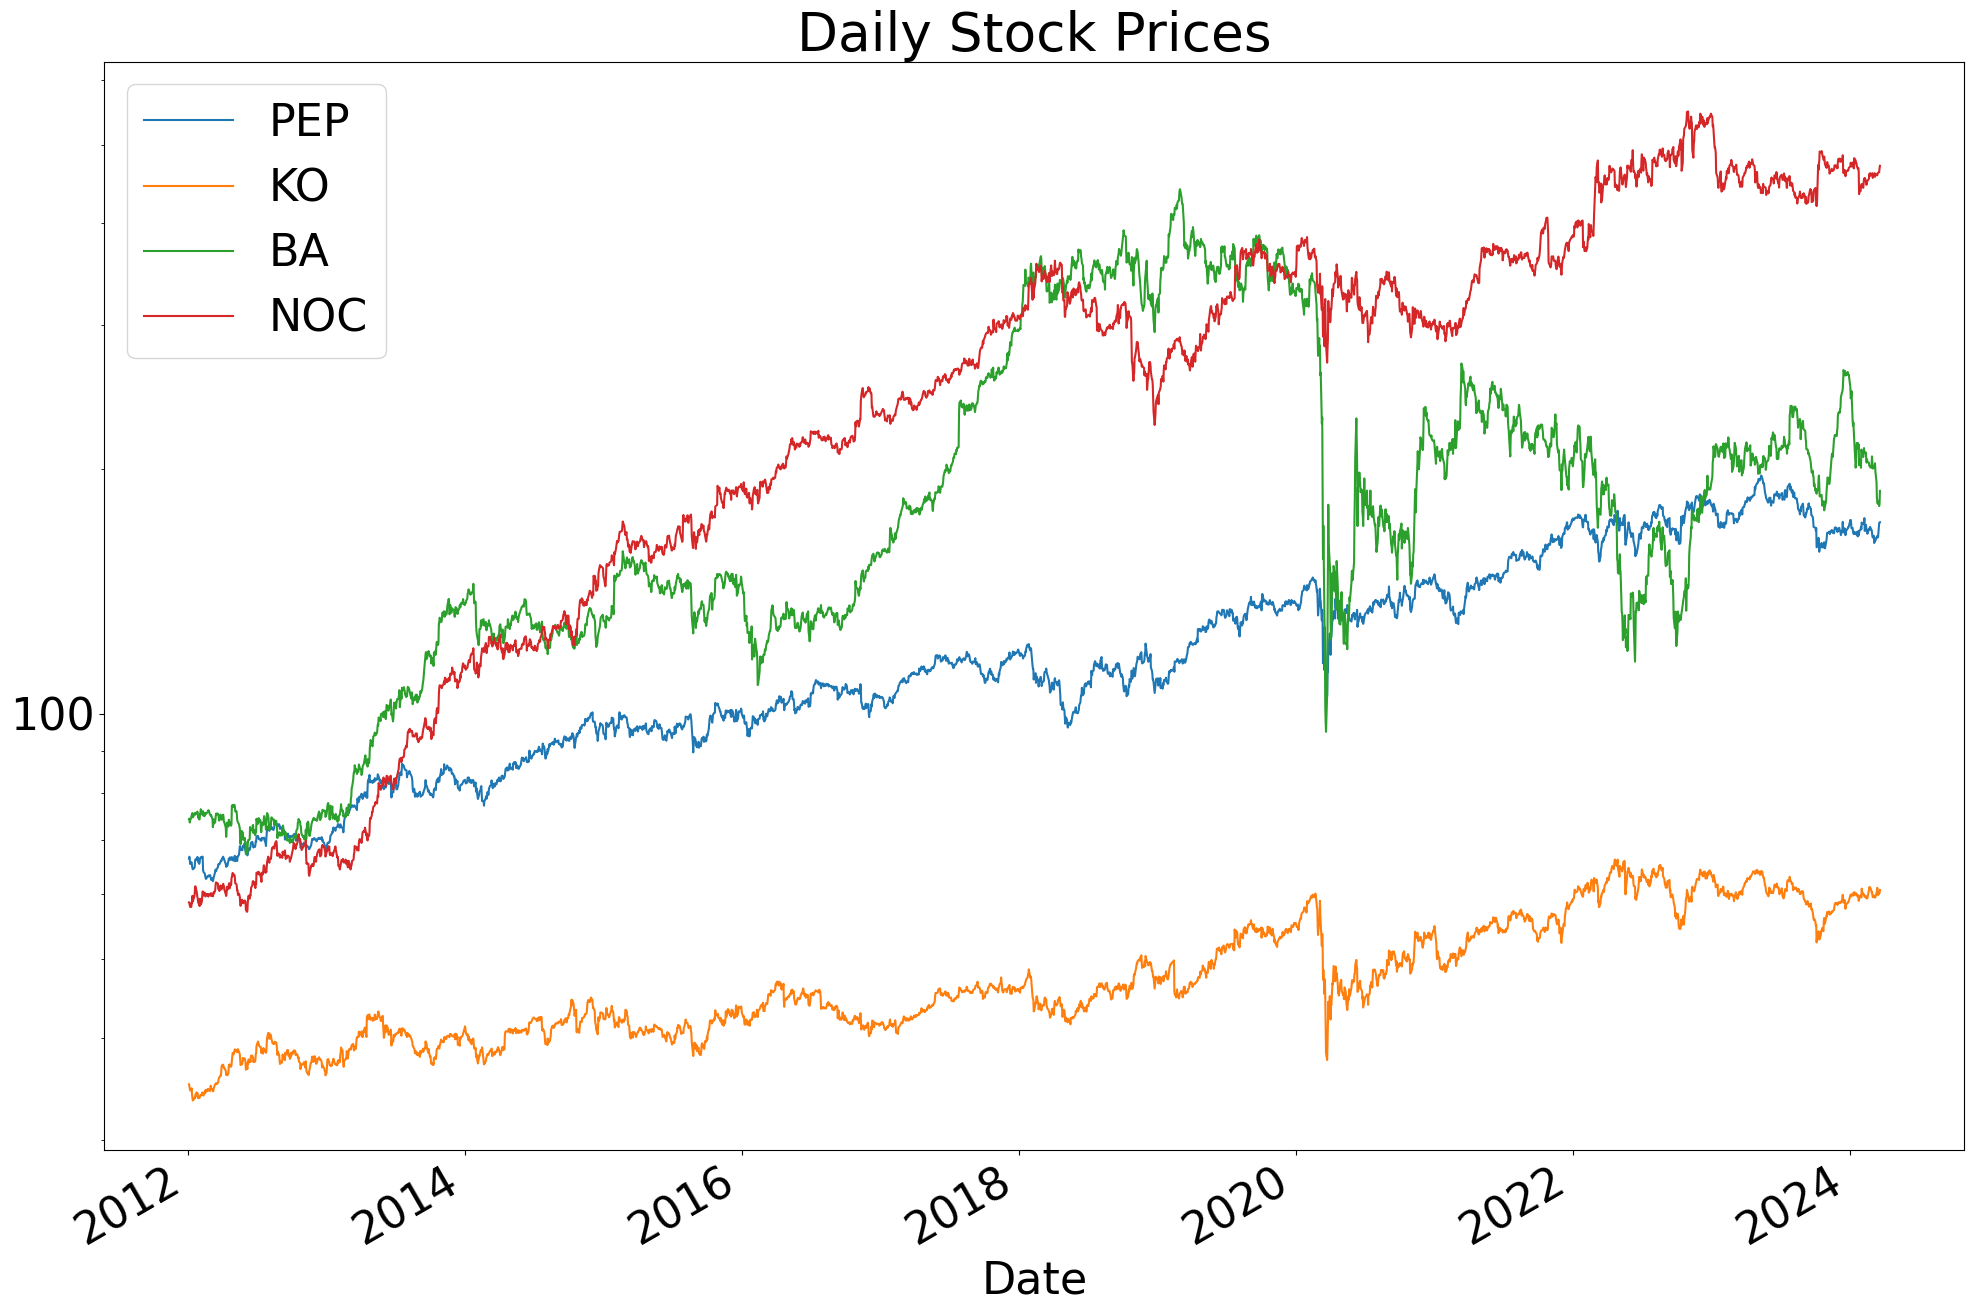

In [18]:
# set default font size
plt.rcParams.update({'font.size': 32})
fig, ax = plt.subplots(figsize = (24,16))
close_data.plot.line(ax = ax, legend = True)
# set y axis as logged to view changes in proportional terms
# instead of absolute terms
ax.set_yscale("log")
# reset y labels to integer from scientific notation
y_vals = ax.get_yticks()
ax.set_yticklabels([int(y) if y >= 1 else round(y,1) for y in y_vals])    

plt.title("Daily Stock Prices")
plt.show()
plt.close()

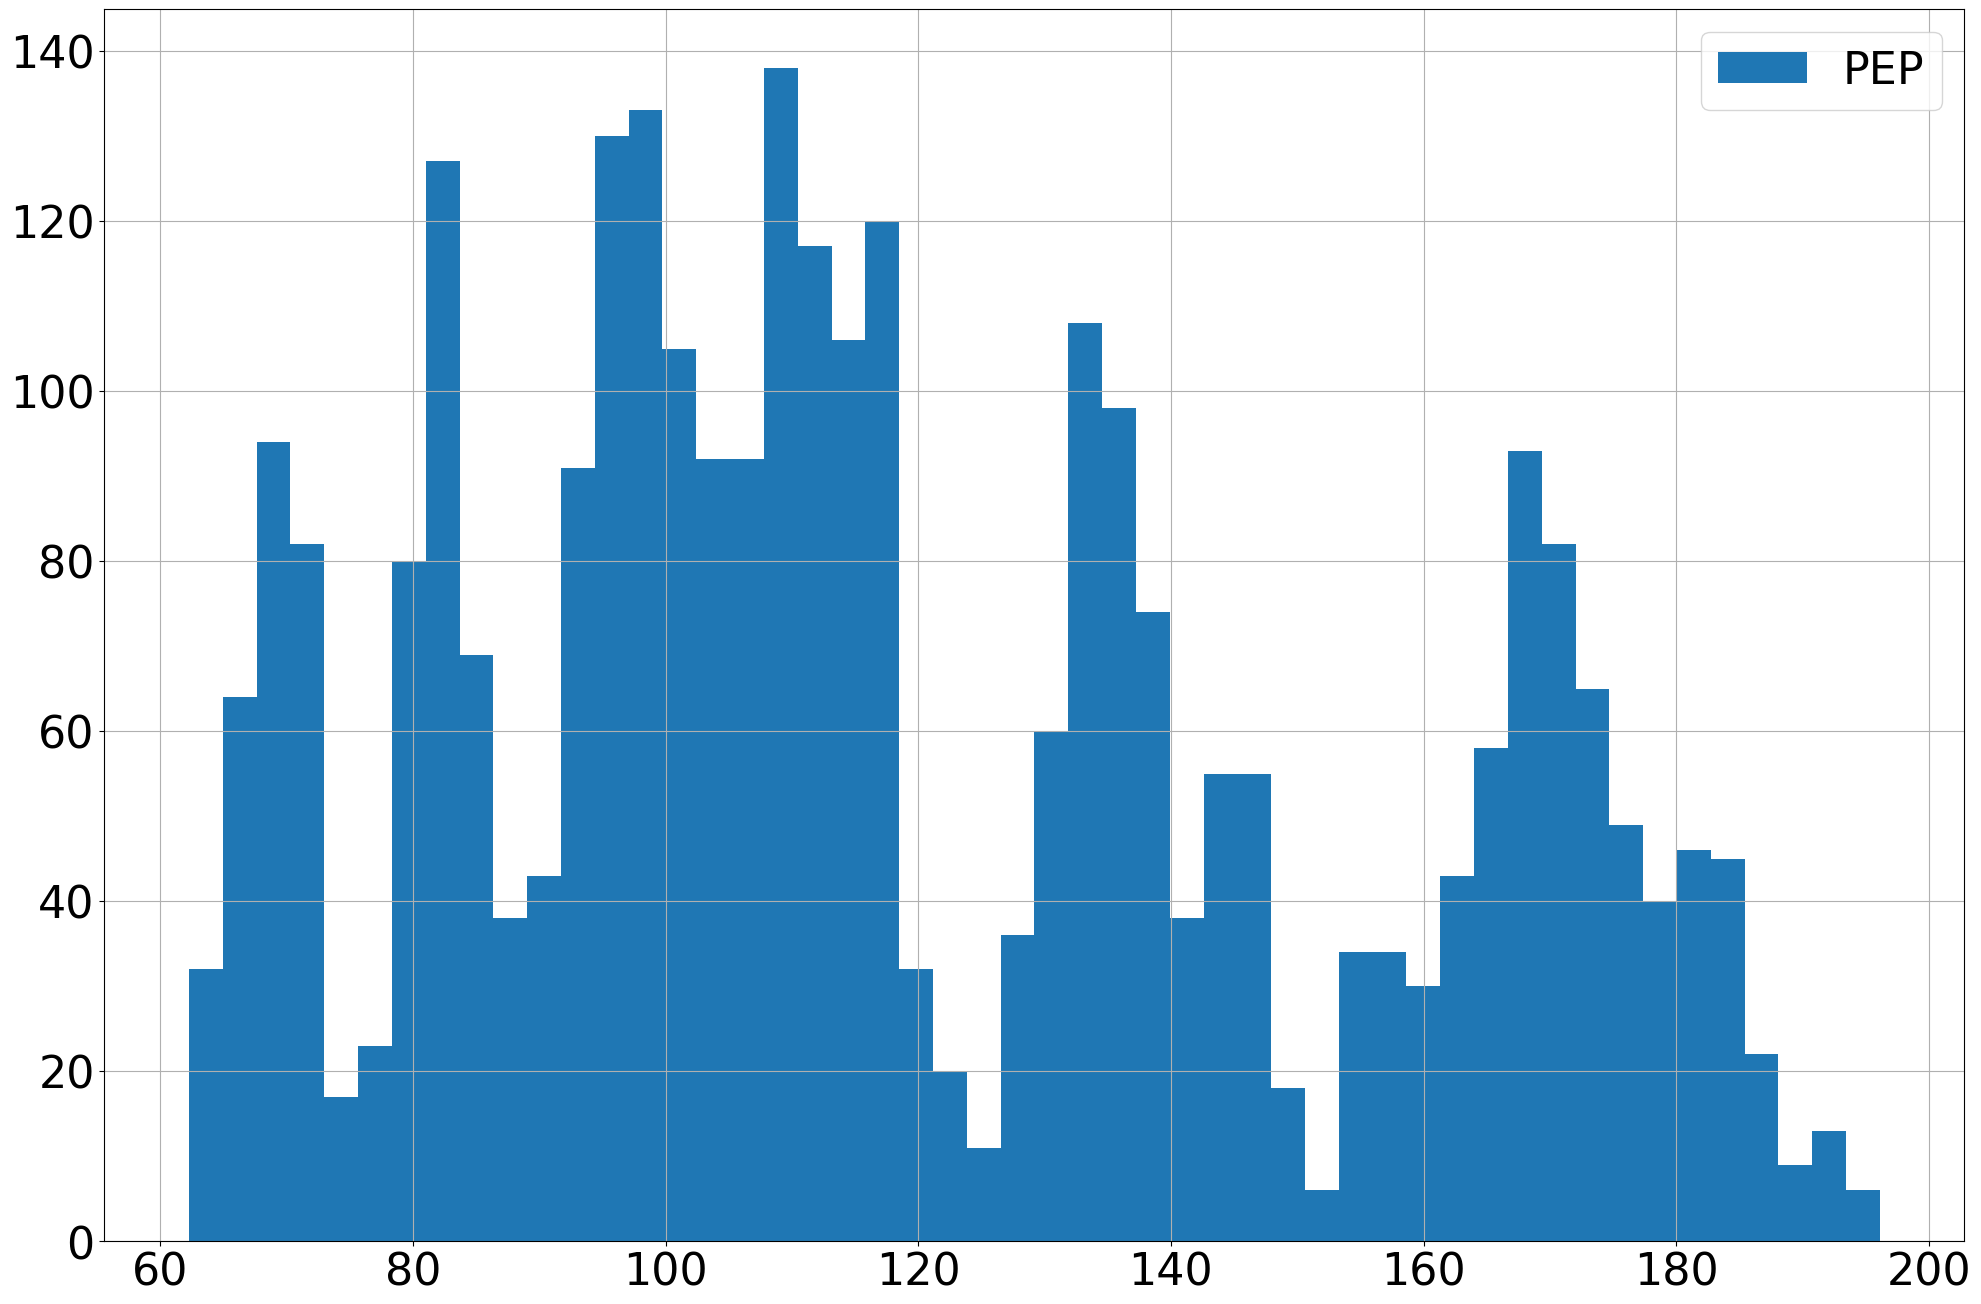

In [19]:
fig, ax = plt.subplots(figsize = (24, 16))
close_data["PEP"].hist(bins = 50, label = "PEP")
plt.legend()

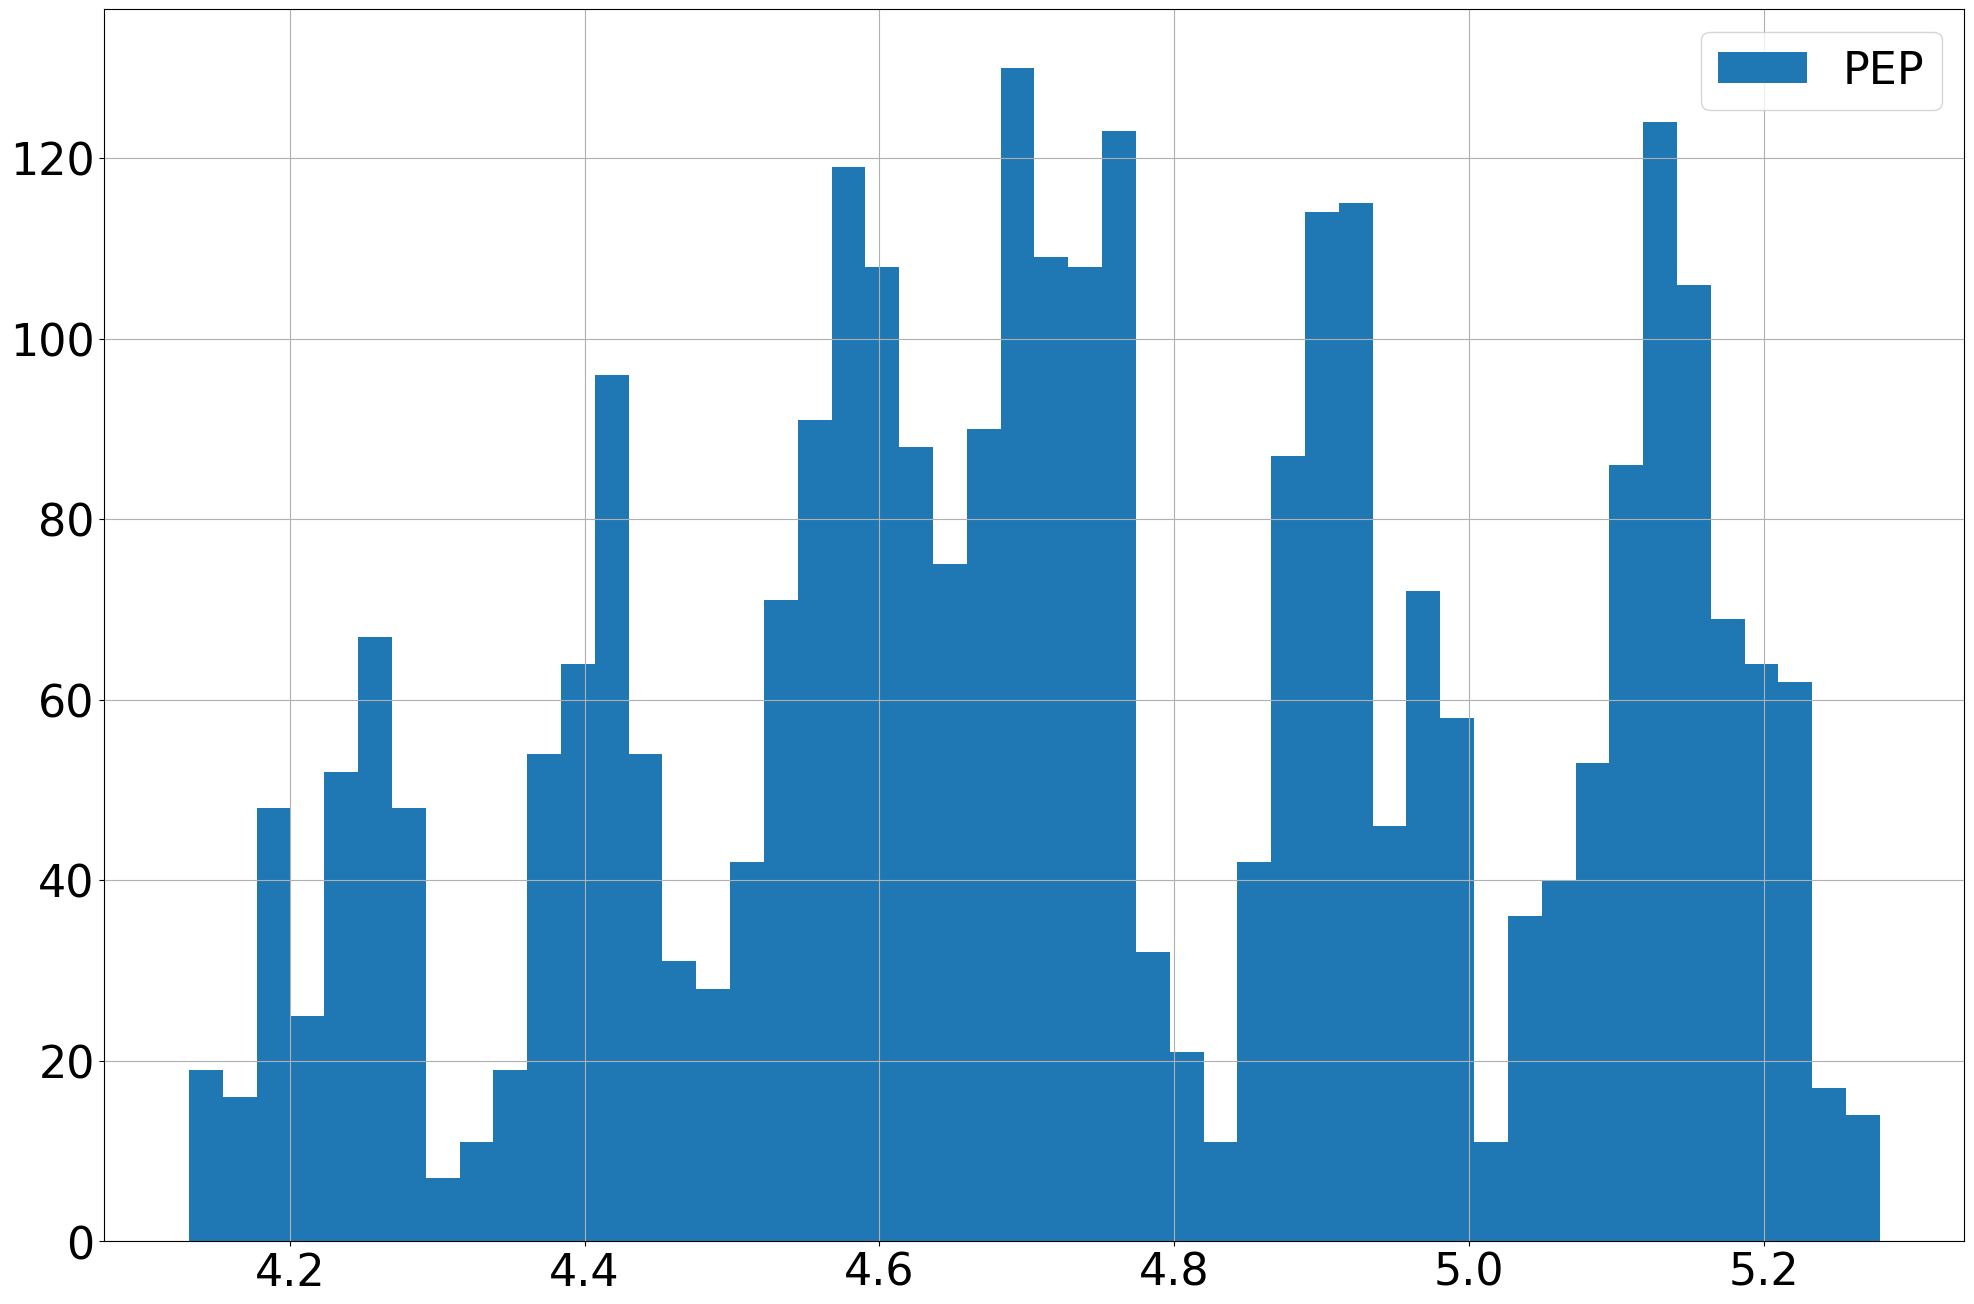

In [20]:
import numpy as np
log_data = np.log(close_data)
fig, ax = plt.subplots(figsize = (24, 16))
log_data["PEP"].hist(bins = 50, label = "PEP")
plt.legend()

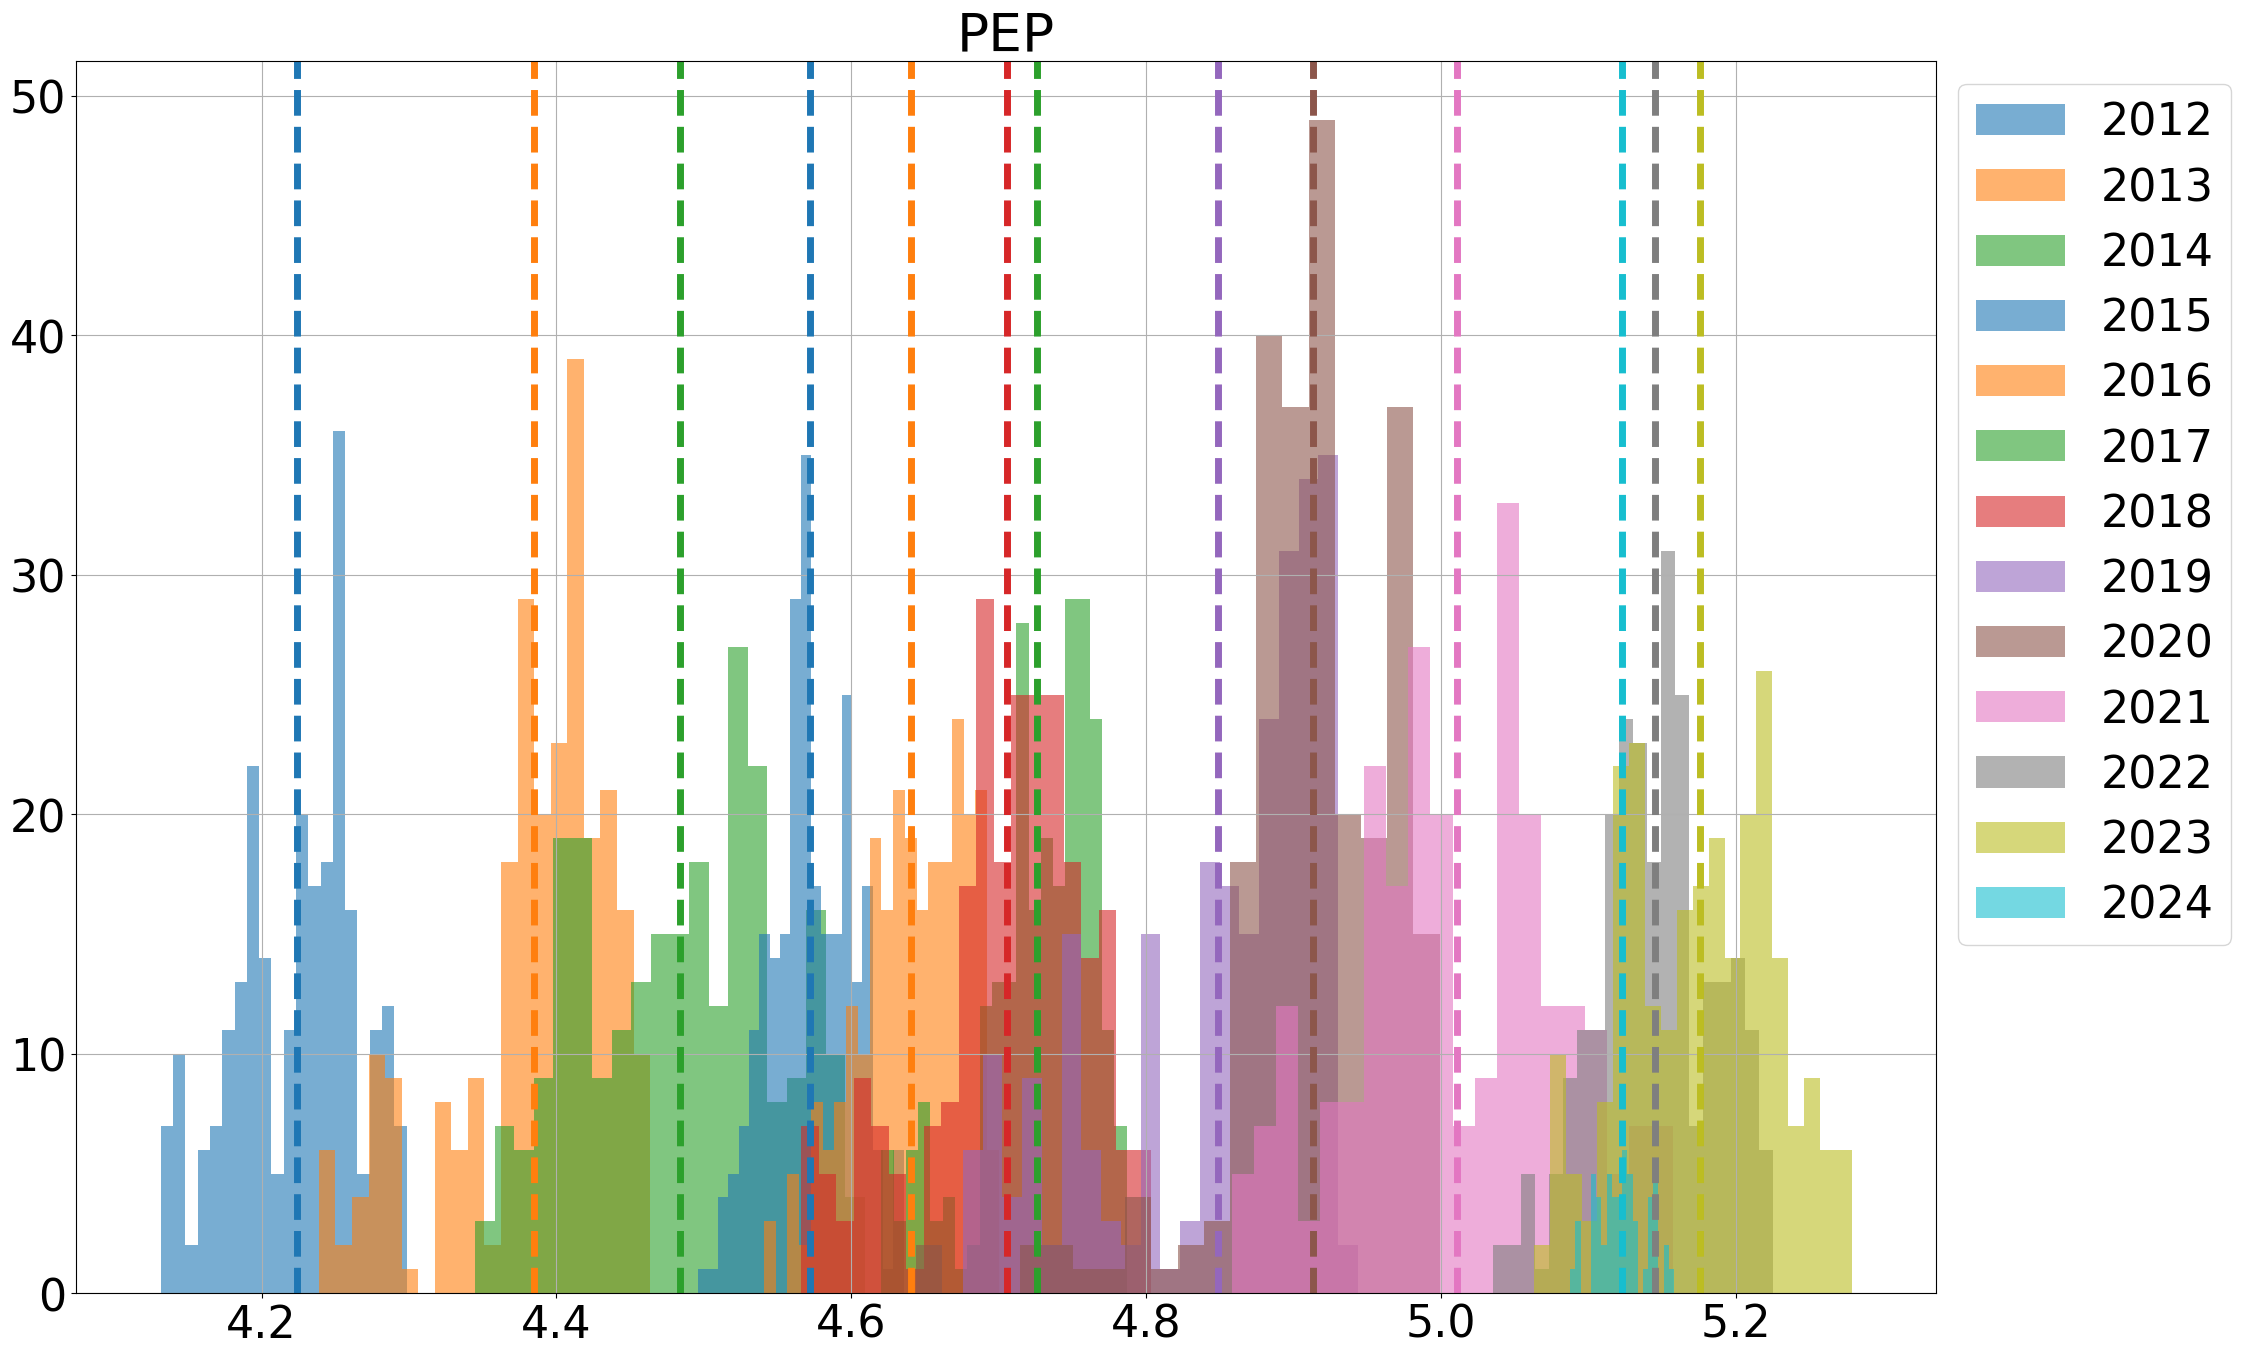

In [21]:
def graph_yearly_distributions(data, key):
    years = sorted(list(set(data.index.year)))
    fig, ax = plt.subplots(figsize = (24, 16))
    for year in years:
        color = "C" + str(year % 13)
        year = str(year)
        plot_data = data[key].loc[year]
        plot_data.hist(bins = 20, color = color,
                       label = year, 
                       alpha = .6, 
                       ax = ax)
        ax.axvline(plot_data.mean(), 
                   color = color, 
                   linewidth = 5, 
                   ls = "--")
    ax.set_title(key)
    ax.legend(bbox_to_anchor = (1,1))
graph_yearly_distributions(log_data, "PEP")

In [22]:
# Log-difference will be a decimal. Transform to percent as whole number by multiplying by 100
price_change_data = log_data.diff().mul(100)

/tmp/ipykernel_121/3444475709.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([str(int(y))+ "%" for y in y_vals])


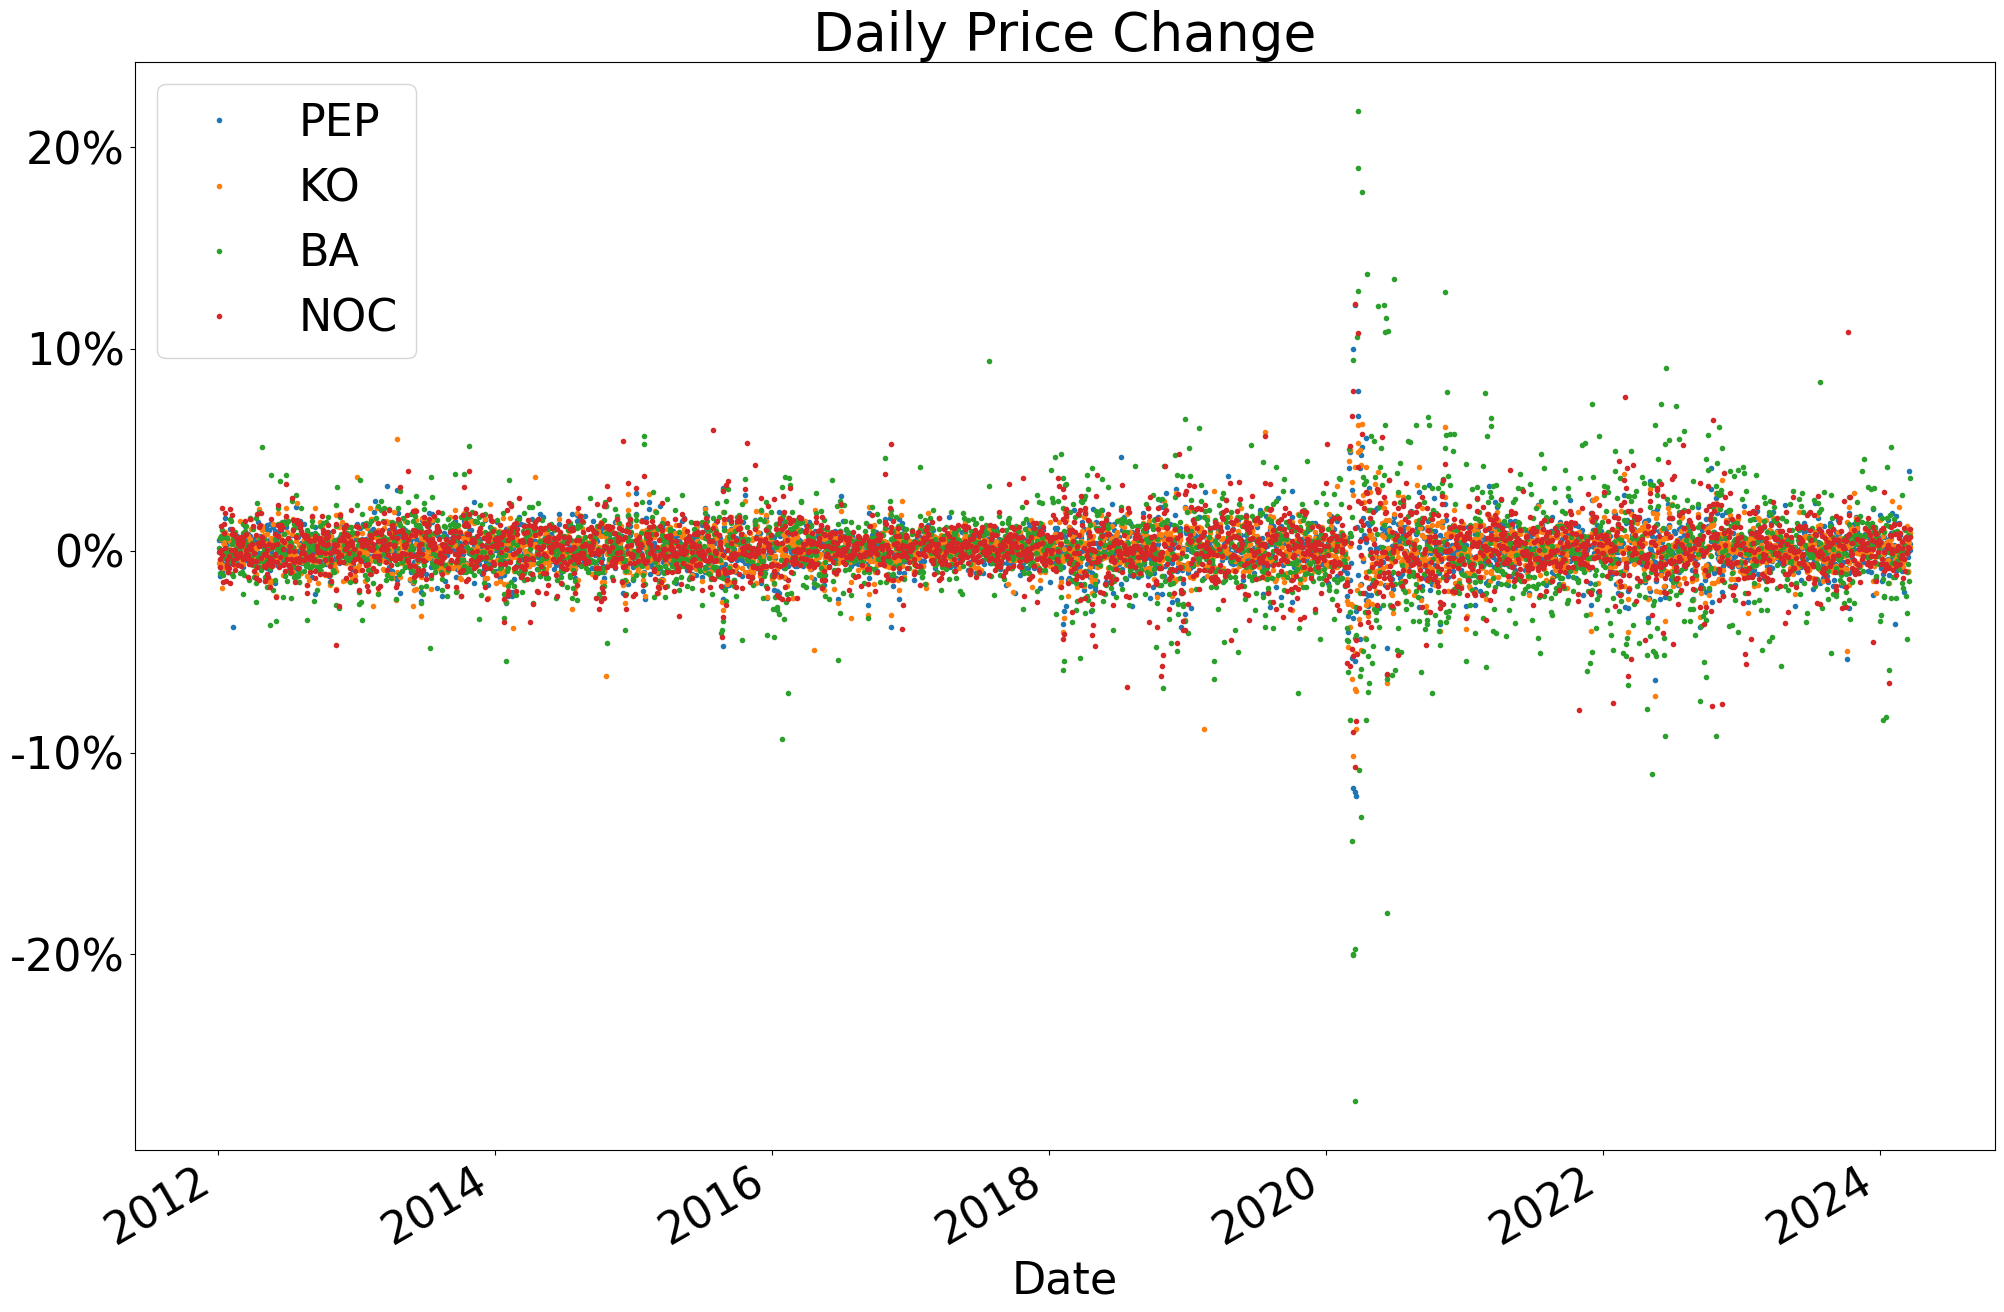

In [23]:
# set default font size
plt.rcParams.update({'font.size': 32})
fig, ax = plt.subplots(figsize = (24,16))
for key in price_change_data:
    # plot as scatter plot over time by setting marker to "." and ls to "" (blank)
    #price_change_data[key].scatter()
    price_change_data[key].plot.line(marker = ".", ls="", ax = ax)
plt.legend()
plt.title("Daily Price Change")
# set y labels to integer include %
y_vals = ax.get_yticks()
ax.set_yticklabels([str(int(y))+ "%" for y in y_vals])    

plt.show()
plt.close()

In [24]:
import import_ipynb
from Stats_Functions import * 

importing Jupyter notebook from Stats_Functions.ipynb


In [25]:
def gather_statistics(df, sample = False):
    dct = {key:{} for key in df}
    for key, val in df.items():
        # drop any missing observations from dataframe
        val = val.dropna(axis=0)
        dct[key]["mean"] = round(mean(val),3)
        dct[key]["median"] = round(median(val),3)
        # skip mode. . .         dct[key]["mode"] = mode(val)
        dct[key]["variance"] = round(variance(val, sample),3)
        dct[key]["SD"] = round(SD(val, sample) ,3)
        dct[key]["skewness"] = round(skewness(val, sample),3)
        dct[key]["kurtosis"] = round(kurtosis(val, sample),3)
    stats_df = pd.DataFrame(dct)
    return stats_df

In [26]:
stats_df = gather_statistics(price_change_data, 
                             sample = True).round(2)
stats_df

PEP        KO        BA       NOC
mean          0.03      0.02      0.03      0.07
median        0.04      0.04      0.05      0.09
variance      1.22      1.21      5.42      2.10
SD            1.11      1.10      2.33      1.45
skewness      0.00      0.00      0.00      0.00
kurtosis  79800.10  41534.27  73691.26  35507.69

/tmp/ipykernel_121/3896365011.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([str(int(x))+ "%" for x in x_vals])


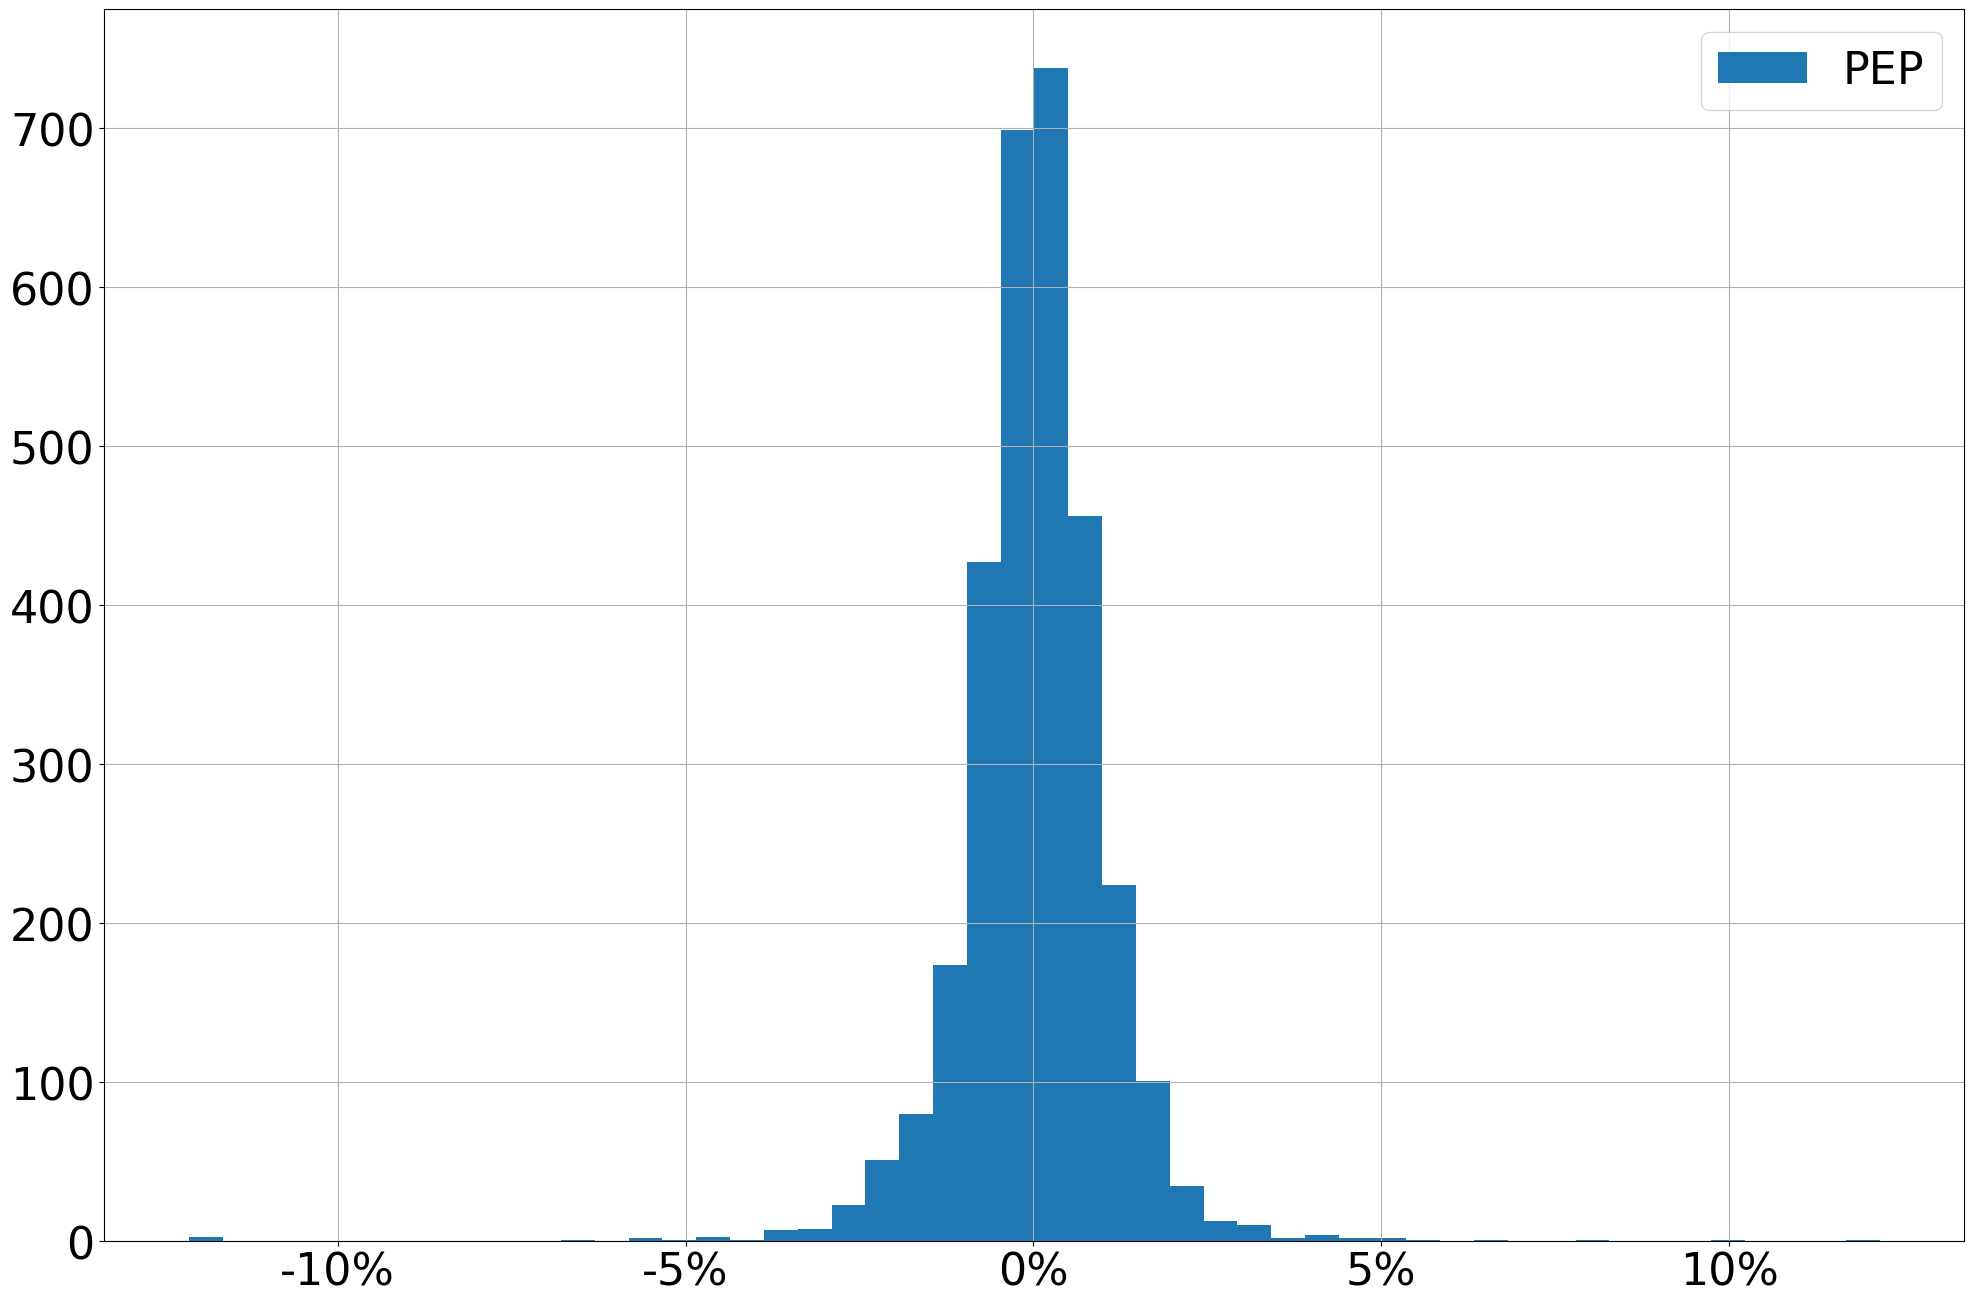

In [27]:
fig, ax = plt.subplots(figsize = (24, 16))
price_change_data["PEP"].hist(bins = 50, label = "PEP")
# set horizontal axis values as percent
x_vals = ax.get_xticks()
ax.set_xticklabels([str(int(x))+ "%" for x in x_vals])    
plt.legend()

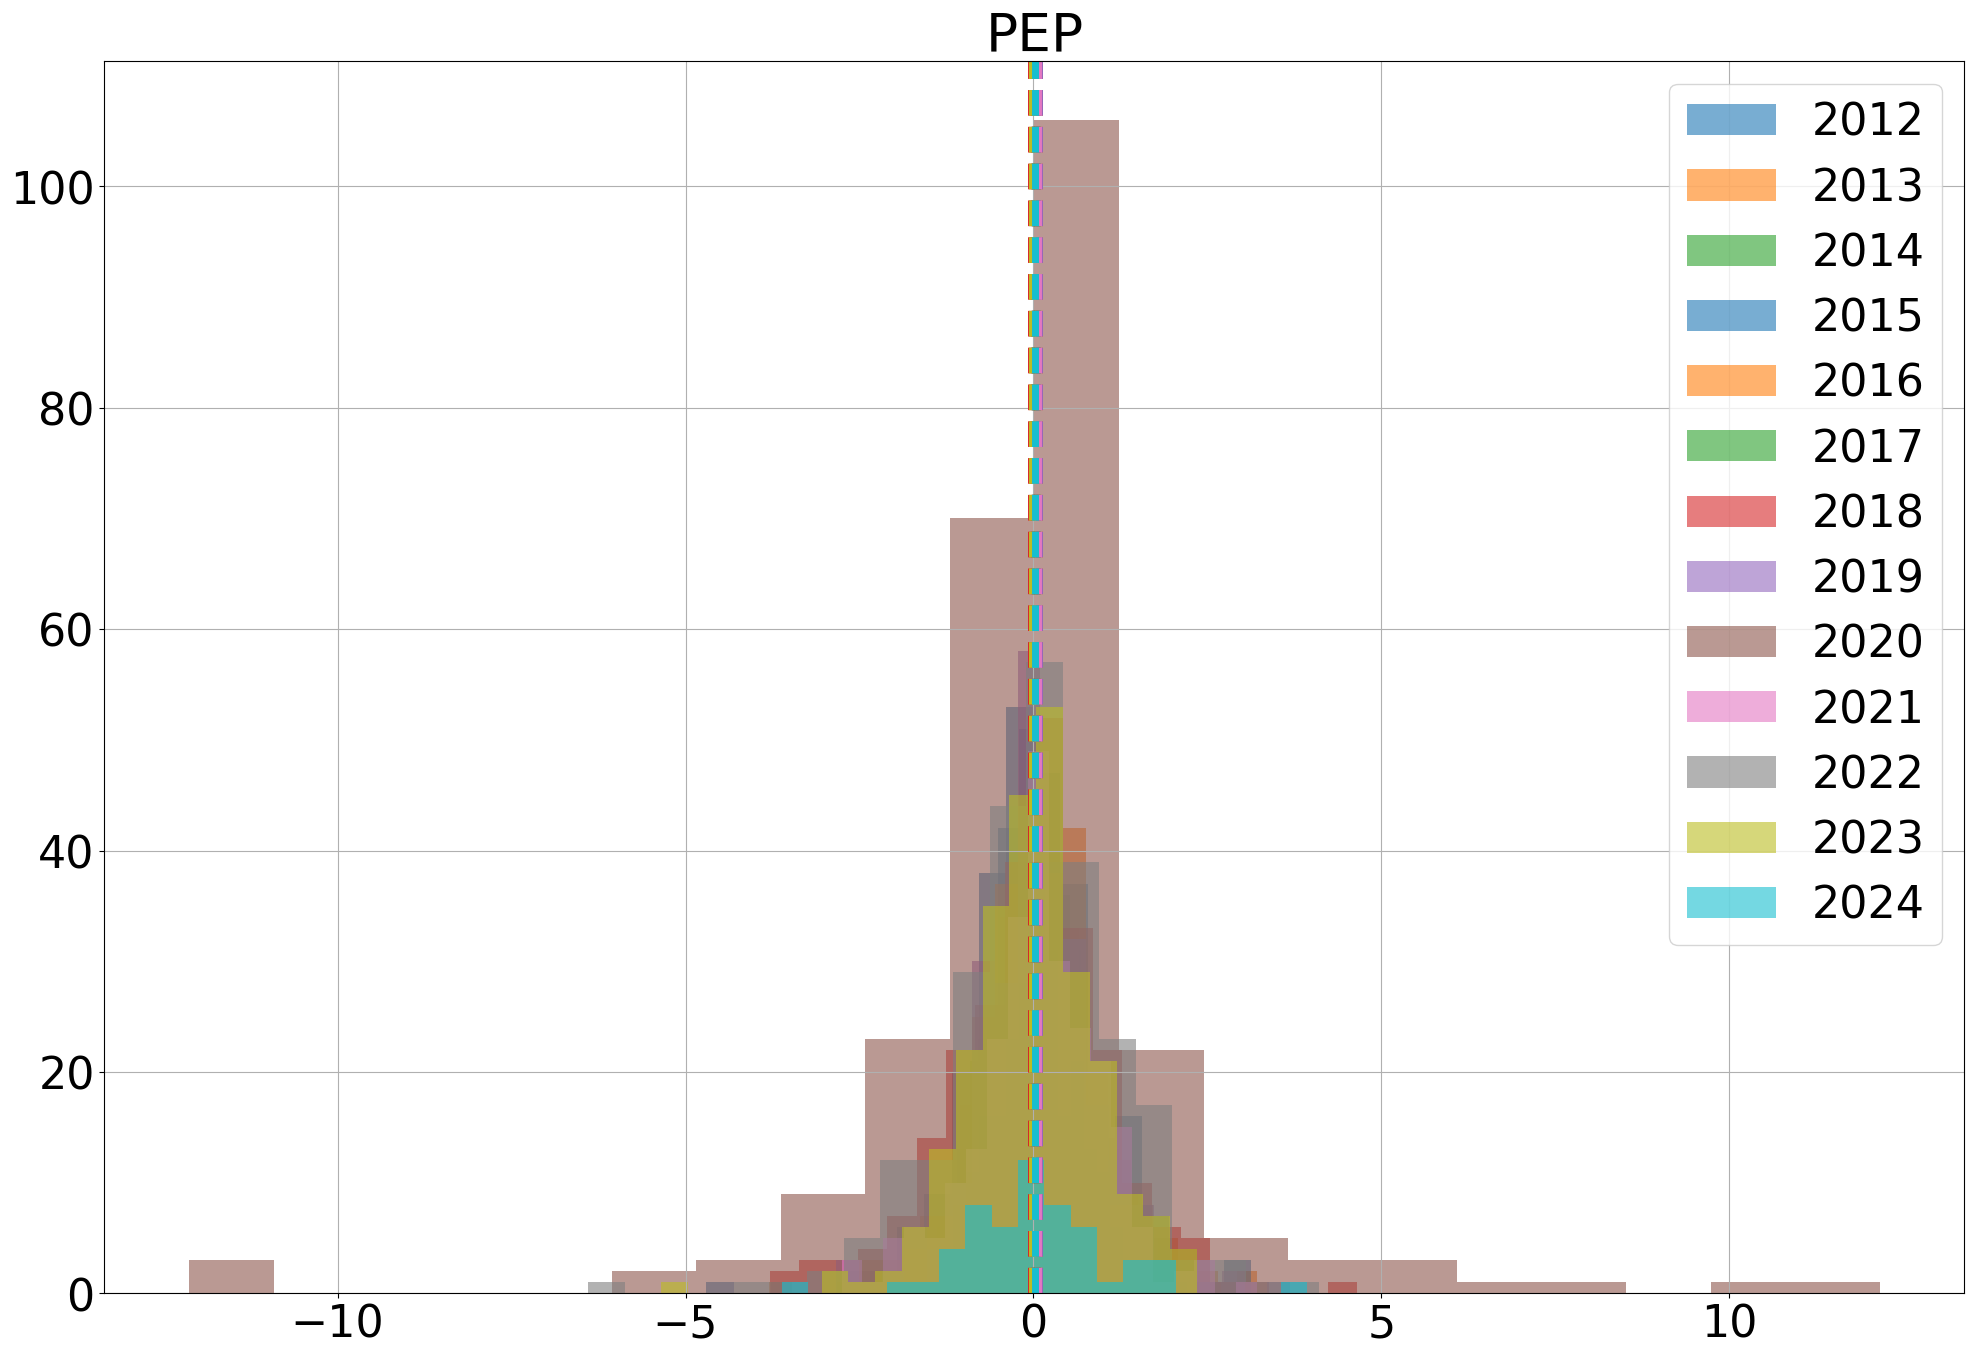

In [28]:
graph_yearly_distributions(price_change_data, 'PEP')

array([[<Axes: title={'center': 'PEP'}>, <Axes: title={'center': 'KO'}>],
       [<Axes: title={'center': 'BA'}>, <Axes: title={'center': 'NOC'}>]],
      dtype=object)

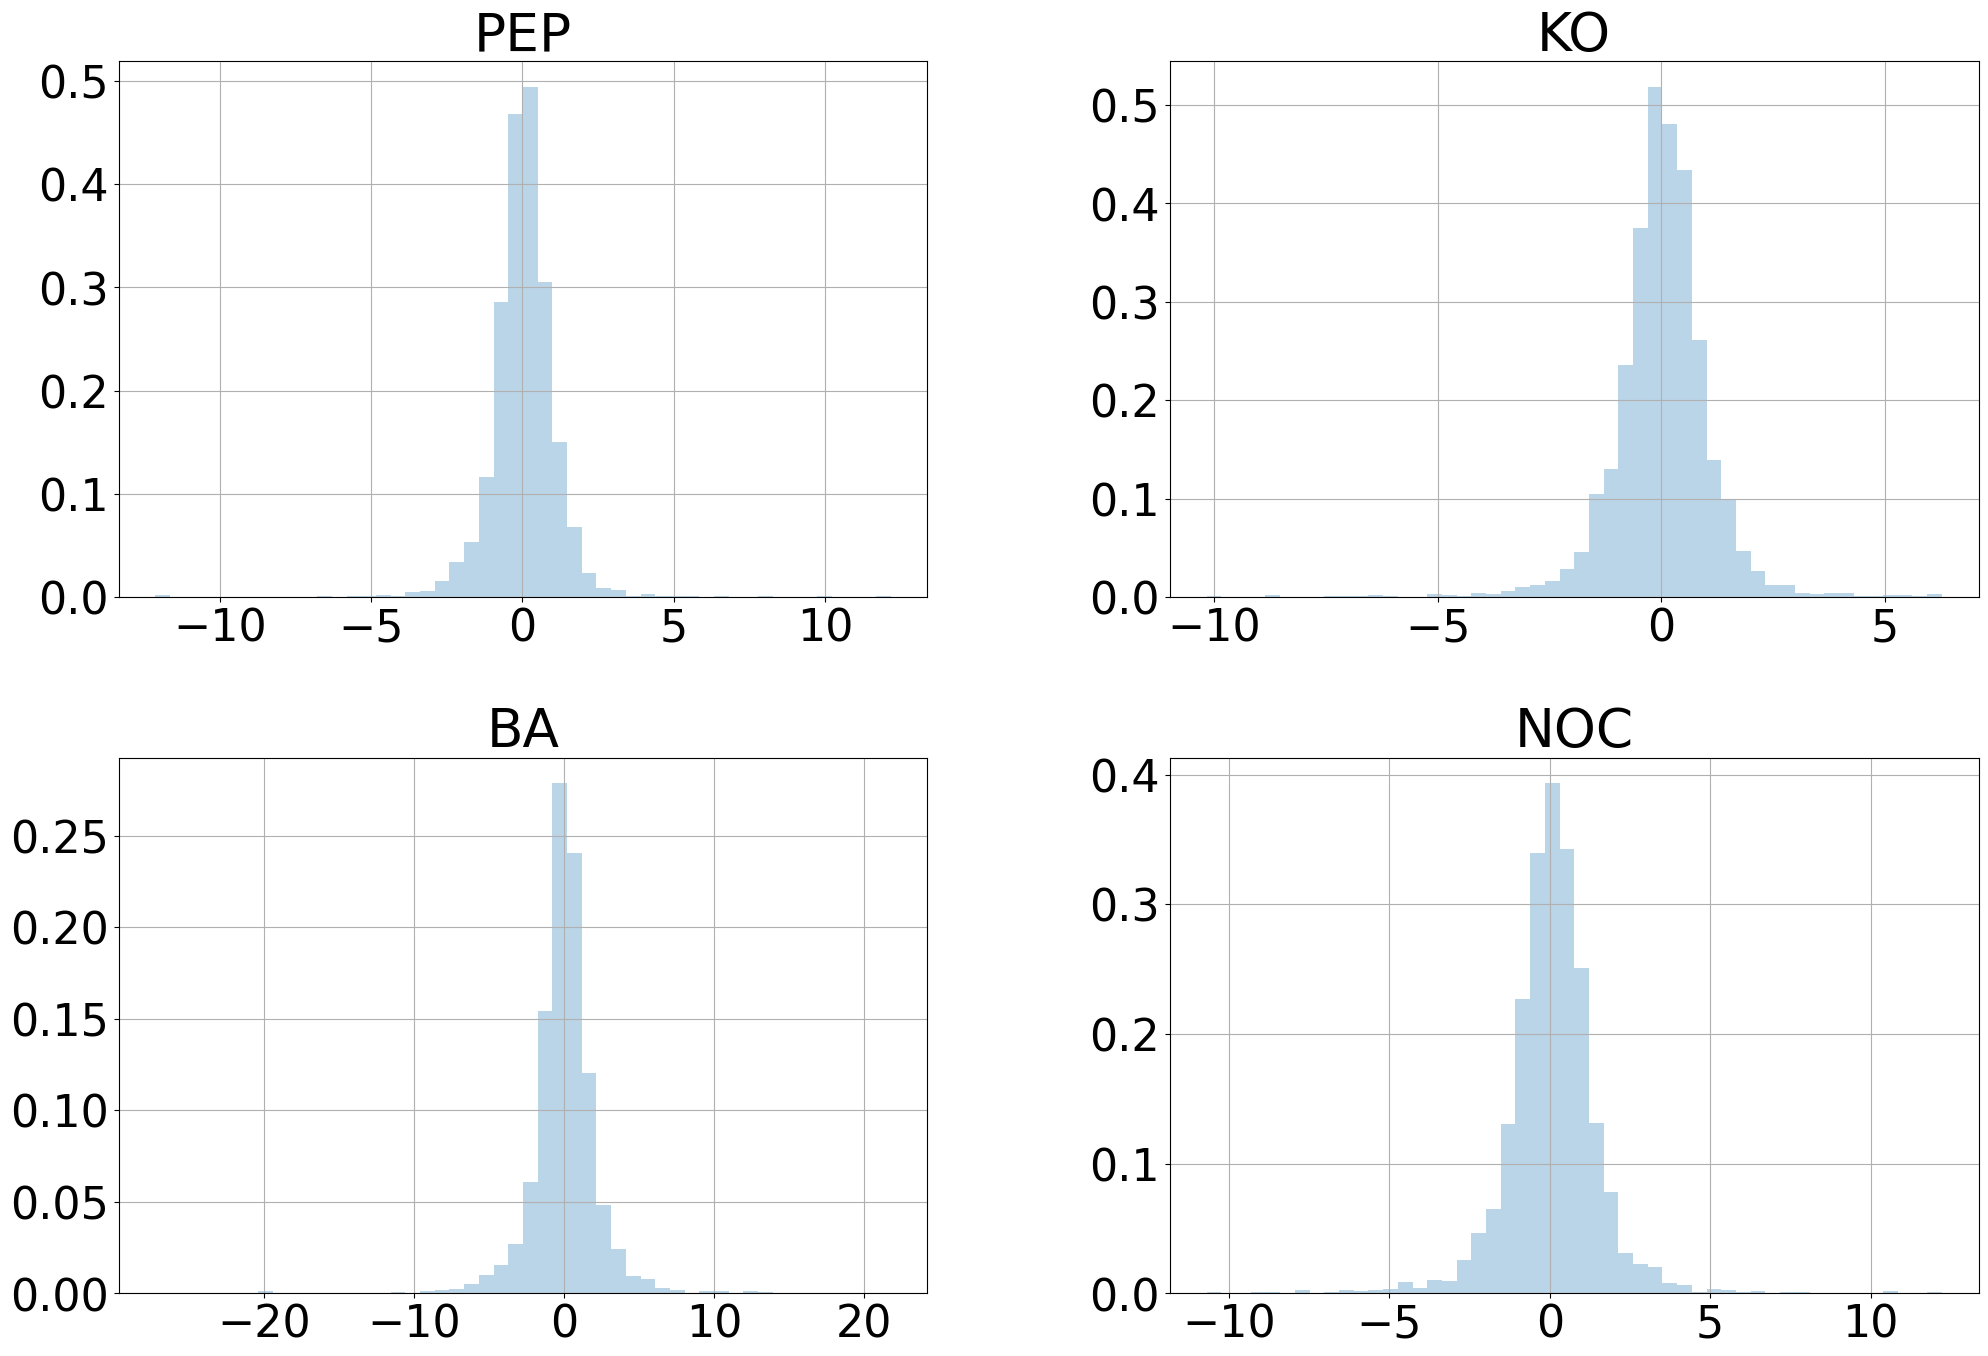

In [29]:
fig, ax = plt.subplots(2,2, figsize = (24,16))
#for key in price_change_data:
price_change_data.hist(bins = 50, 
                       alpha = .3, 
                       label = price_change_data.keys(), 
                       ax = ax, 
                       density = True)

/tmp/ipykernel_121/2921978567.py:34: UserWarning: FixedFormatter should only be used together with FixedLocator
  a.set_xticklabels([str(int(x))+ "%" for x in x_vals])
/tmp/ipykernel_121/2921978567.py:36: UserWarning: FixedFormatter should only be used together with FixedLocator
  a.set_yticklabels([str(int(y * 100))+ "%" for y in y_vals])


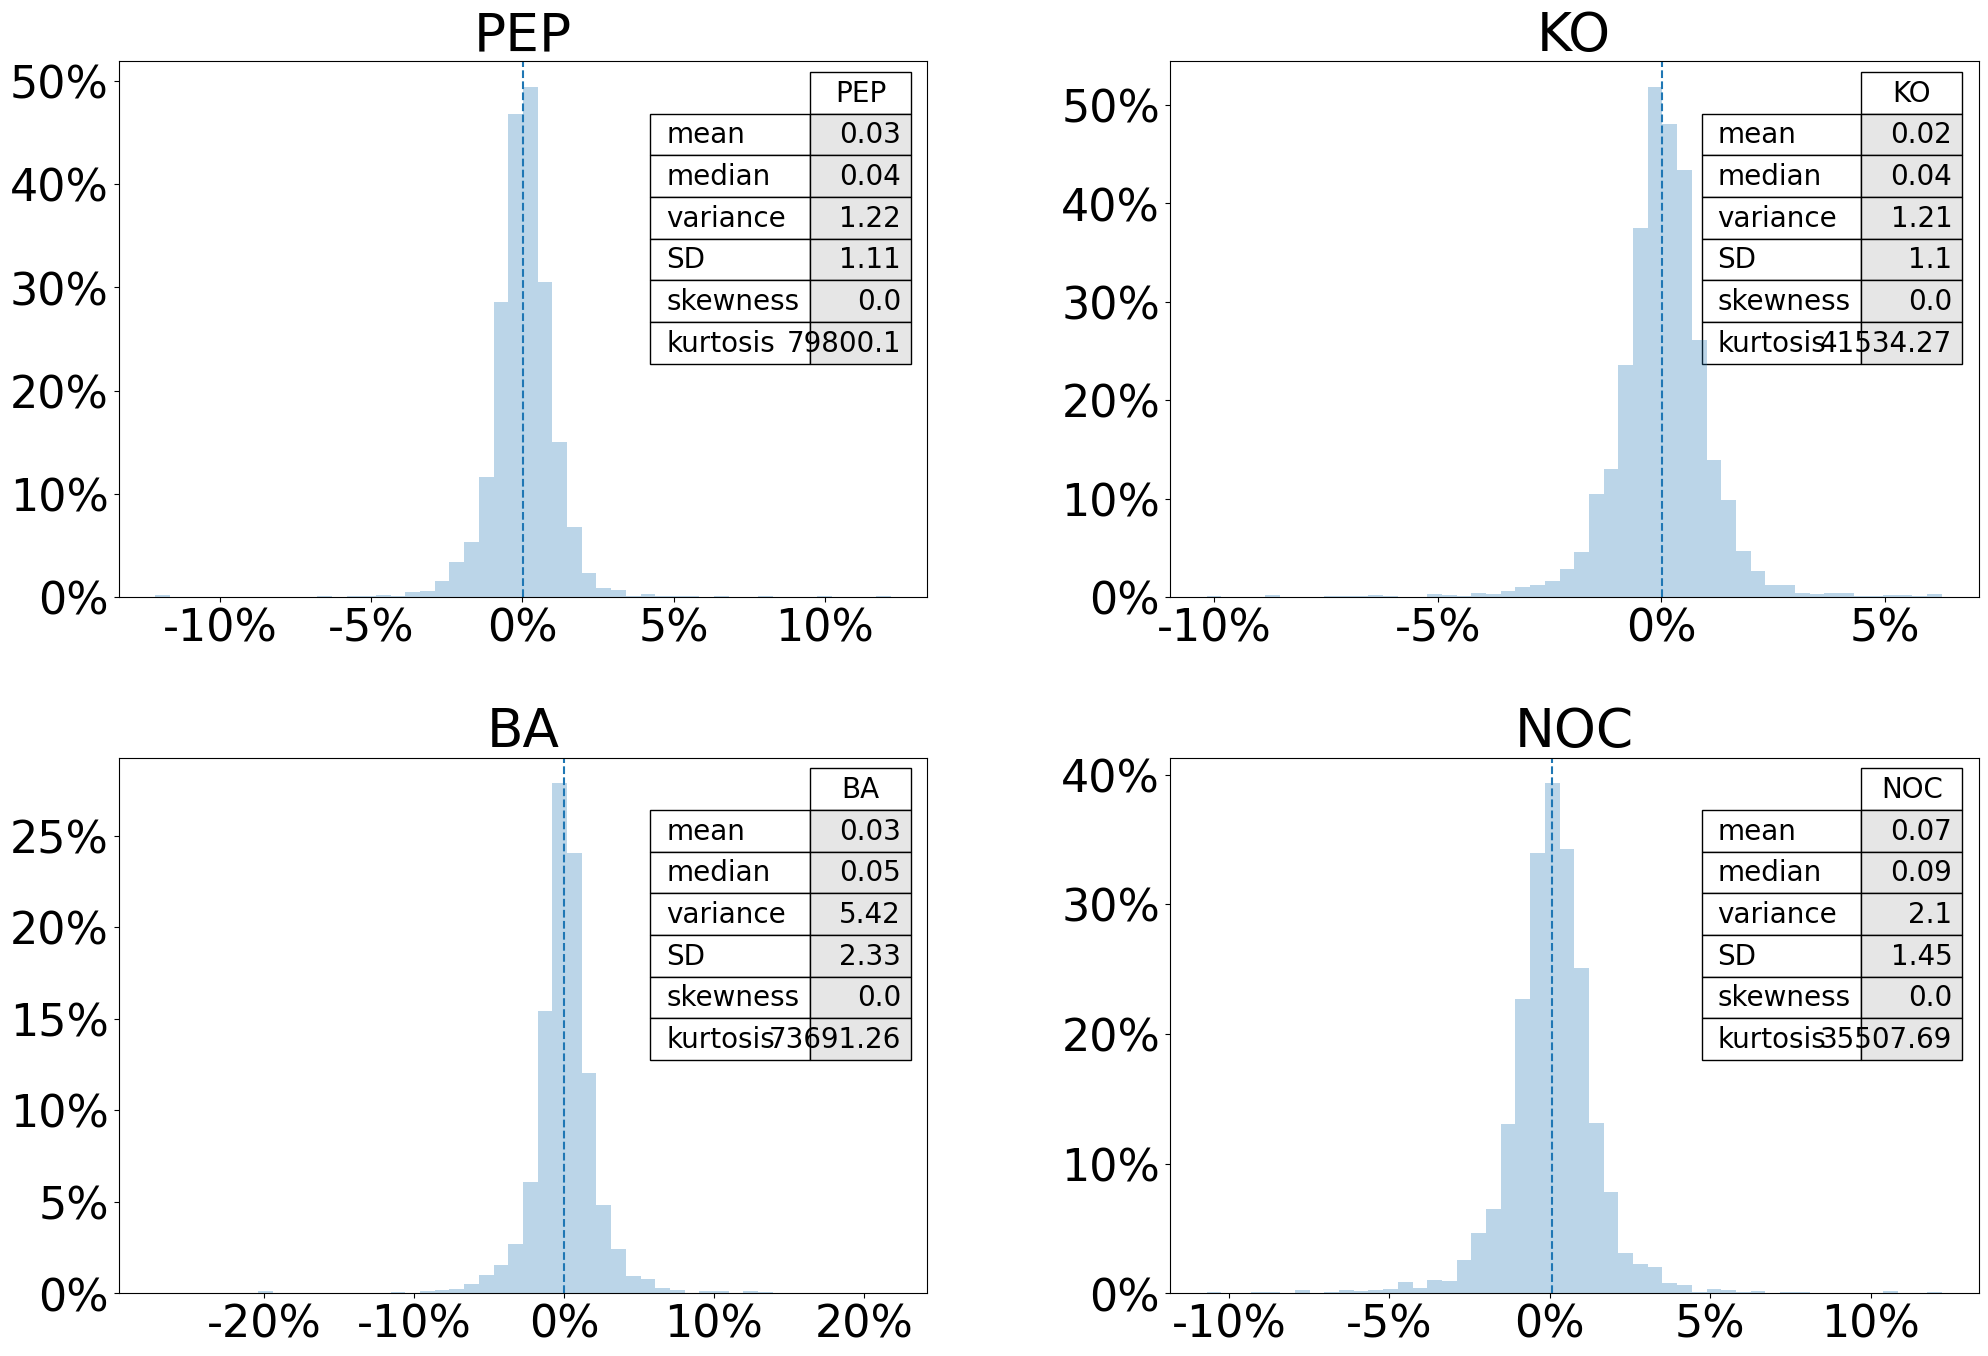

In [30]:
from pandas.plotting import table

fig, ax = plt.subplots(2,2, figsize = (24,16))
#for key in price_change_data:
price_change_data.hist(bins = 50, 
                       alpha = .3, 
                       label = price_change_data.keys(), 
                       ax = ax, 
                       density = True)

# plot table with summary statistics
for i in range(len(ax)):
    for j in range(len(ax[i])):
        # select hist plot for each stock
        a = ax[i][j]
        # identify stock
        stock = a.get_title()
        # save summary statistics data
        hist_data = stats_df[stock] 
        # plot summary statistics within the histogram plot
        stats =table(a, hist_data, 
                     colWidths=[.1], 
                     cellColours=[[(.9,.9,.9)]]*6, 
                     loc = "upper right")
        stats.scale(1.25,2.5)
        stats.auto_set_font_size(False)
        stats.set_fontsize(20)
        
        
        # mark the mean
        a.axvline(x = hist_data.loc["mean"], ls="--")
        # set horizontal axis values as percent
        x_vals = a.get_xticks()
        a.set_xticklabels([str(int(x))+ "%" for x in x_vals])   
        y_vals = a.get_yticks()
        a.set_yticklabels([str(int(y * 100))+ "%" for y in y_vals]) 
        # Turn of grid lines
        a.grid(False)

   
plt.show()

/tmp/ipykernel_121/1063863002.py:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([str(int(x))+ "%" for x in x_vals])
/tmp/ipykernel_121/1063863002.py:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([str(int(y * 100))+ "%" for y in y_vals])


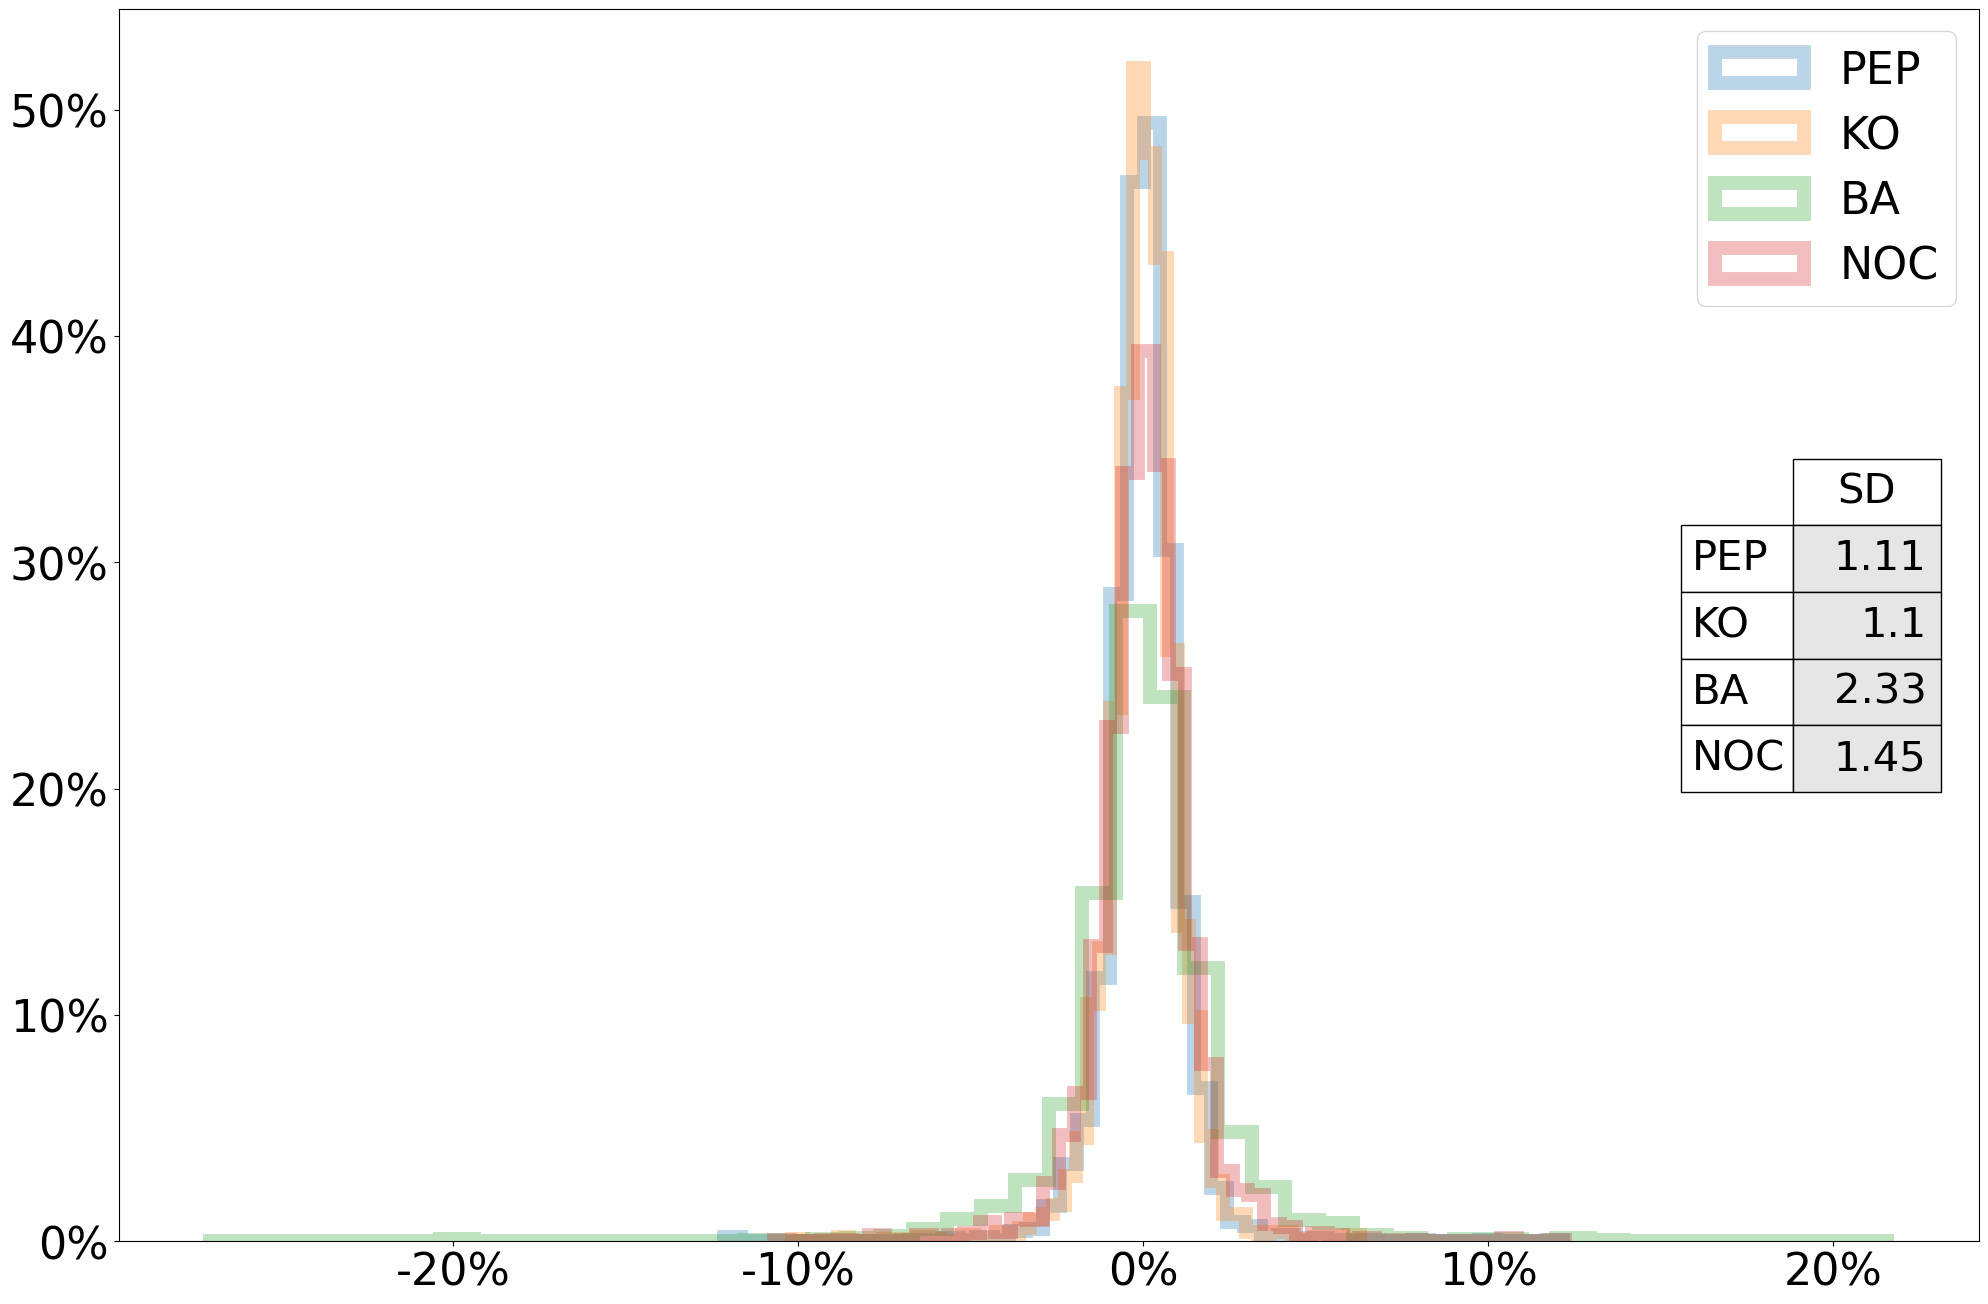

In [31]:
fig, ax = plt.subplots(figsize = (24,16))
for key in price_change_data:
    price_change_data[key].hist(bins = 50, histtype = "step", 
                                alpha = .3, label = key, linewidth = 10, 
                                density = True)
# set horizontal axis values as percent
x_vals = ax.get_xticks()
ax.set_xticklabels([str(int(x))+ "%" for x in x_vals])    
# set vertical axis values as percent
y_vals = ax.get_yticks()
ax.set_yticklabels([str(int(y * 100))+ "%" for y in y_vals]) 
# Include a table with the standard deviation of each stock
stats =table(ax, stats_df.loc["SD"], colWidths=[.1], 
             cellColours=[[(.9,.9,.9)]]*4, loc = "center right")
stats.scale(.8,4)
stats.auto_set_font_size(False)
stats.set_fontsize(30)
ax.grid(False)

plt.legend()

/tmp/ipykernel_121/1941671220.py:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([str(int(x))+ "%" for x in x_vals])
/tmp/ipykernel_121/1941671220.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([str(int(y * 100))+ "%" for y in y_vals])


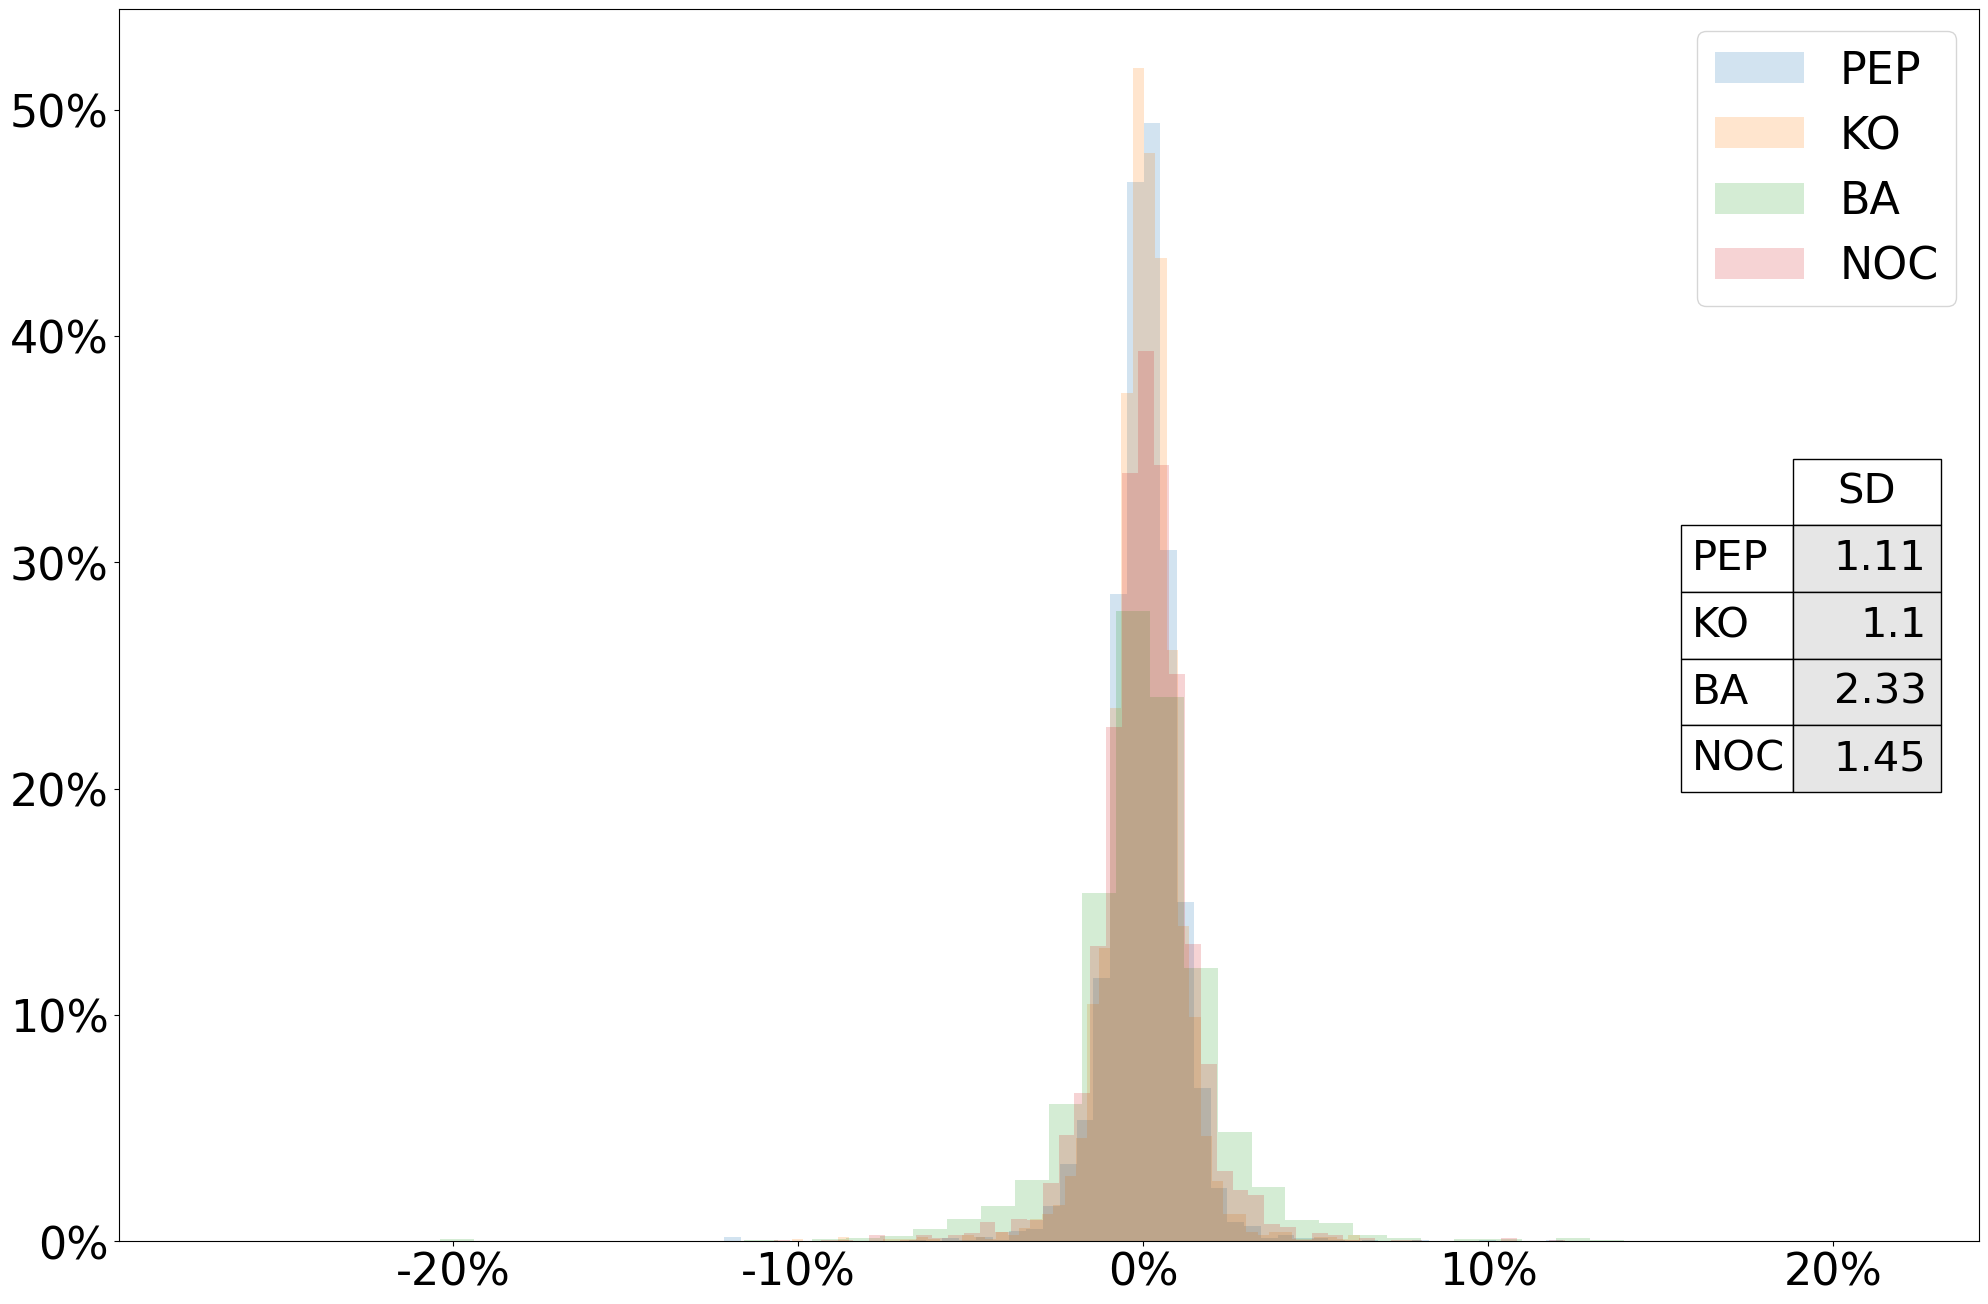

In [32]:
fig, ax = plt.subplots(figsize = (24,16))
for key in price_change_data:
    price_change_data[key].hist(bins = 50, alpha = .2, label = key, 
                                density = True)
# set horizontal axis values as percent
x_vals = ax.get_xticks()
ax.set_xticklabels([str(int(x))+ "%" for x in x_vals])    
# set vertical axis values as percent
y_vals = ax.get_yticks()
ax.set_yticklabels([str(int(y * 100))+ "%" for y in y_vals])
# Include a table with the standard deviation of each stock
stats =table(ax, stats_df.loc["SD"], colWidths=[.1], cellColours=[[(.9,.9,.9)]]*4, loc = "center right")
stats.scale(.8,4)
stats.auto_set_font_size(False)
stats.set_fontsize(30)
ax.grid(False)

plt.legend()

/tmp/ipykernel_121/522336999.py:27: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([str(int(y * 100))+ "%" for y in y_vals])


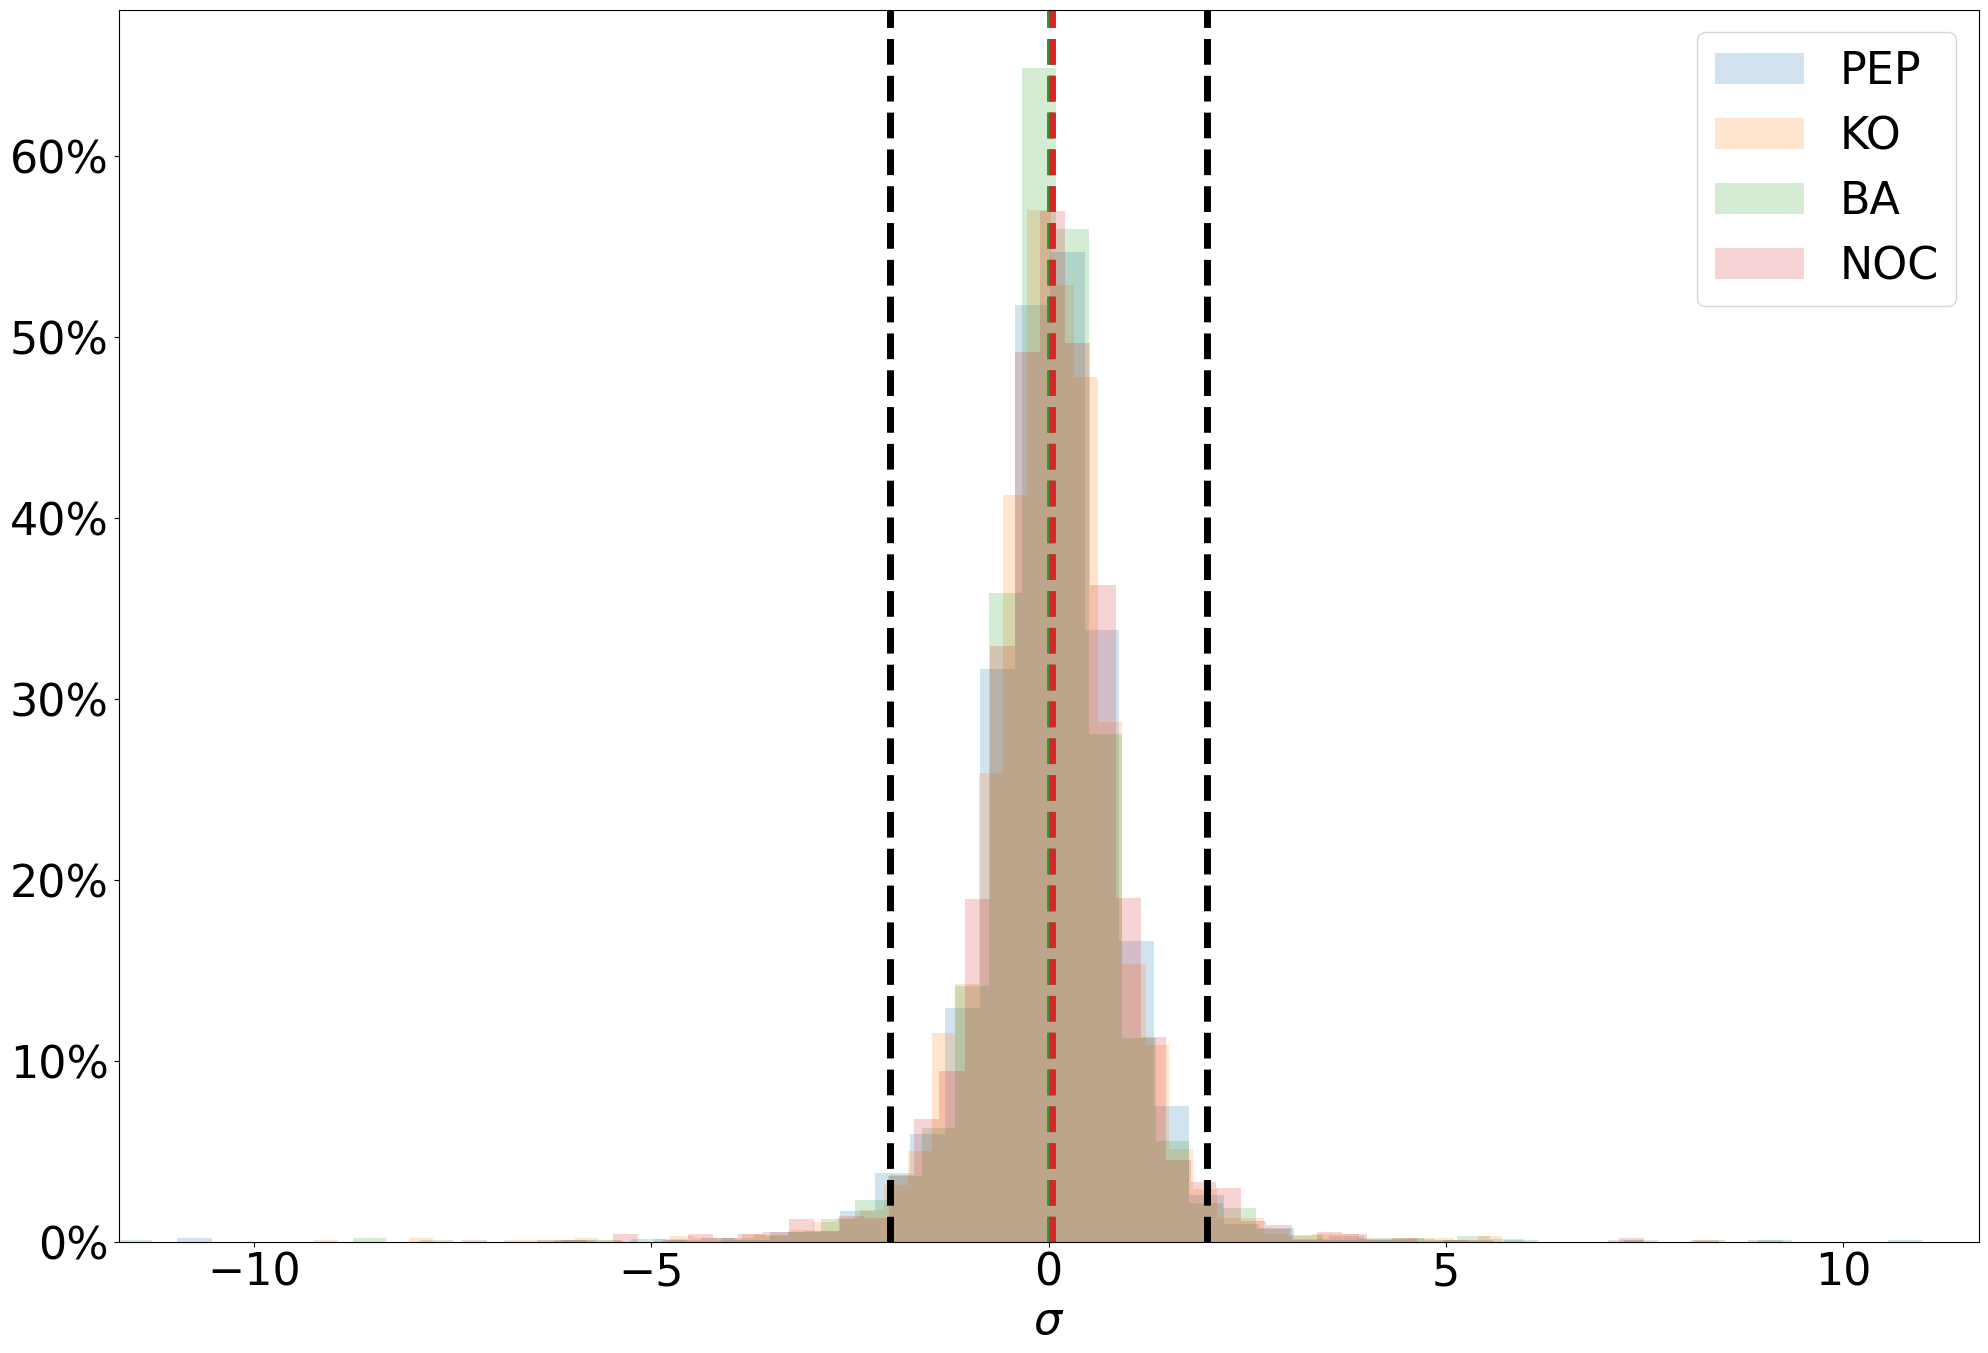

In [33]:
fig, ax = plt.subplots(figsize = (24,16))

 
plot_data = price_change_data.div(
    price_change_data.std())[stocks]
for i in range(len(plot_data.keys())):
    key = list(plot_data.keys())[i]
    val = plot_data[key].dropna()
    color = "C" + str(i)
    val.hist(bins = 50, 
             alpha = .2, 
             label = key,
             density = True,
             color = color,
             ax = ax)
    ax.axvline(val.mean(), 
               linewidth = 5, 
               ls = "--", 
               color = color)
# set horizontal axis values as percent
x_vals = ax.get_xticks()
ax.axvline(-2, linewidth = 5, ls = "--", color = "k")
ax.axvline(2, linewidth = 5, ls = "--", color = "k")

# set vertical axis values as percent
y_vals = ax.get_yticks()
ax.set_yticklabels([str(int(y * 100))+ "%" for y in y_vals])
# Include a table with the standard deviation of each stock
ax.grid(False)
abs_min_x = abs(plot_data.min().min())
abs_max_x = abs(plot_data.max().max())
min_max = abs_min_x if abs_min_x > abs_max_x else abs_max_x
ax.set_xlim(-1 * min_max, min_max)
ax.set_xlabel("$\\sigma$")
plt.legend()

In [34]:
stocks = list(price_change_data.keys())
price_change_data["S&P500"] = web.get_data_yahoo('^GSPC', 
                       start,
                       end)["Adj Close"]
price_change_data["S&P500"] = np.log(price_change_data["S&P500"]).diff().mul(100)
price_change_data.head()

[*********************100%%**********************]  1 of 1 completed


PEP        KO        BA       NOC    S&P500
Date                                                        
2012-01-03       NaN       NaN       NaN       NaN       NaN
2012-01-04  0.510736 -0.629296  0.148099 -0.051153  0.018791
2012-01-05 -0.782189 -0.474574 -1.082119 -0.822062  0.293939
2012-01-06 -1.261322 -0.636304  0.610136 -0.430849 -0.254019
2012-01-09  0.518616  0.000000  0.740688  0.017267  0.225904

In [64]:
def calculate_beta(data, stock_key, market_key):
    df = data[[stock_key, market_key]].dropna()
    stock_cov = covariance(df[stock_key], df[market_key], sample = True) 
    market_var = variance(df[market_key], sample = True)
    beta = stock_cov / market_var
    
    return beta
    
betas = {}

for stock in stocks:
    betas[stock] = calculate_beta(price_change_data, stock, "S&P500")
pd.DataFrame(betas, index = ["$\\beta$"]).T

$\beta$
PEP  0.644020
KO   0.616196
BA   1.348467
NOC  0.675133

/tmp/ipykernel_121/3026281572.py:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[0].set_xticklabels([str(x) + "%" for x in ax[0].get_xticks()])
/tmp/ipykernel_121/3026281572.py:19: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[0].set_yticklabels([str(round(y * 100,2)) + "%" for y in ax[0].get_yticks()])
/tmp/ipykernel_121/3026281572.py:37: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[1].set_yticklabels([str(y) + "%" for y in ax[1].get_yticks()])
/tmp/ipykernel_121/3026281572.py:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[0].set_xticklabels([str(x) + "%" for x in ax[0].get_xticks()])
/tmp/ipykernel_121/3026281572.py:19: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[0].set_yticklabels([str(round(y * 100,2)) + "%" for y in ax[0].get_yticks()])
/tmp/ipykernel_121/3026281572.py:37: UserWarning: FixedFormatter shoul

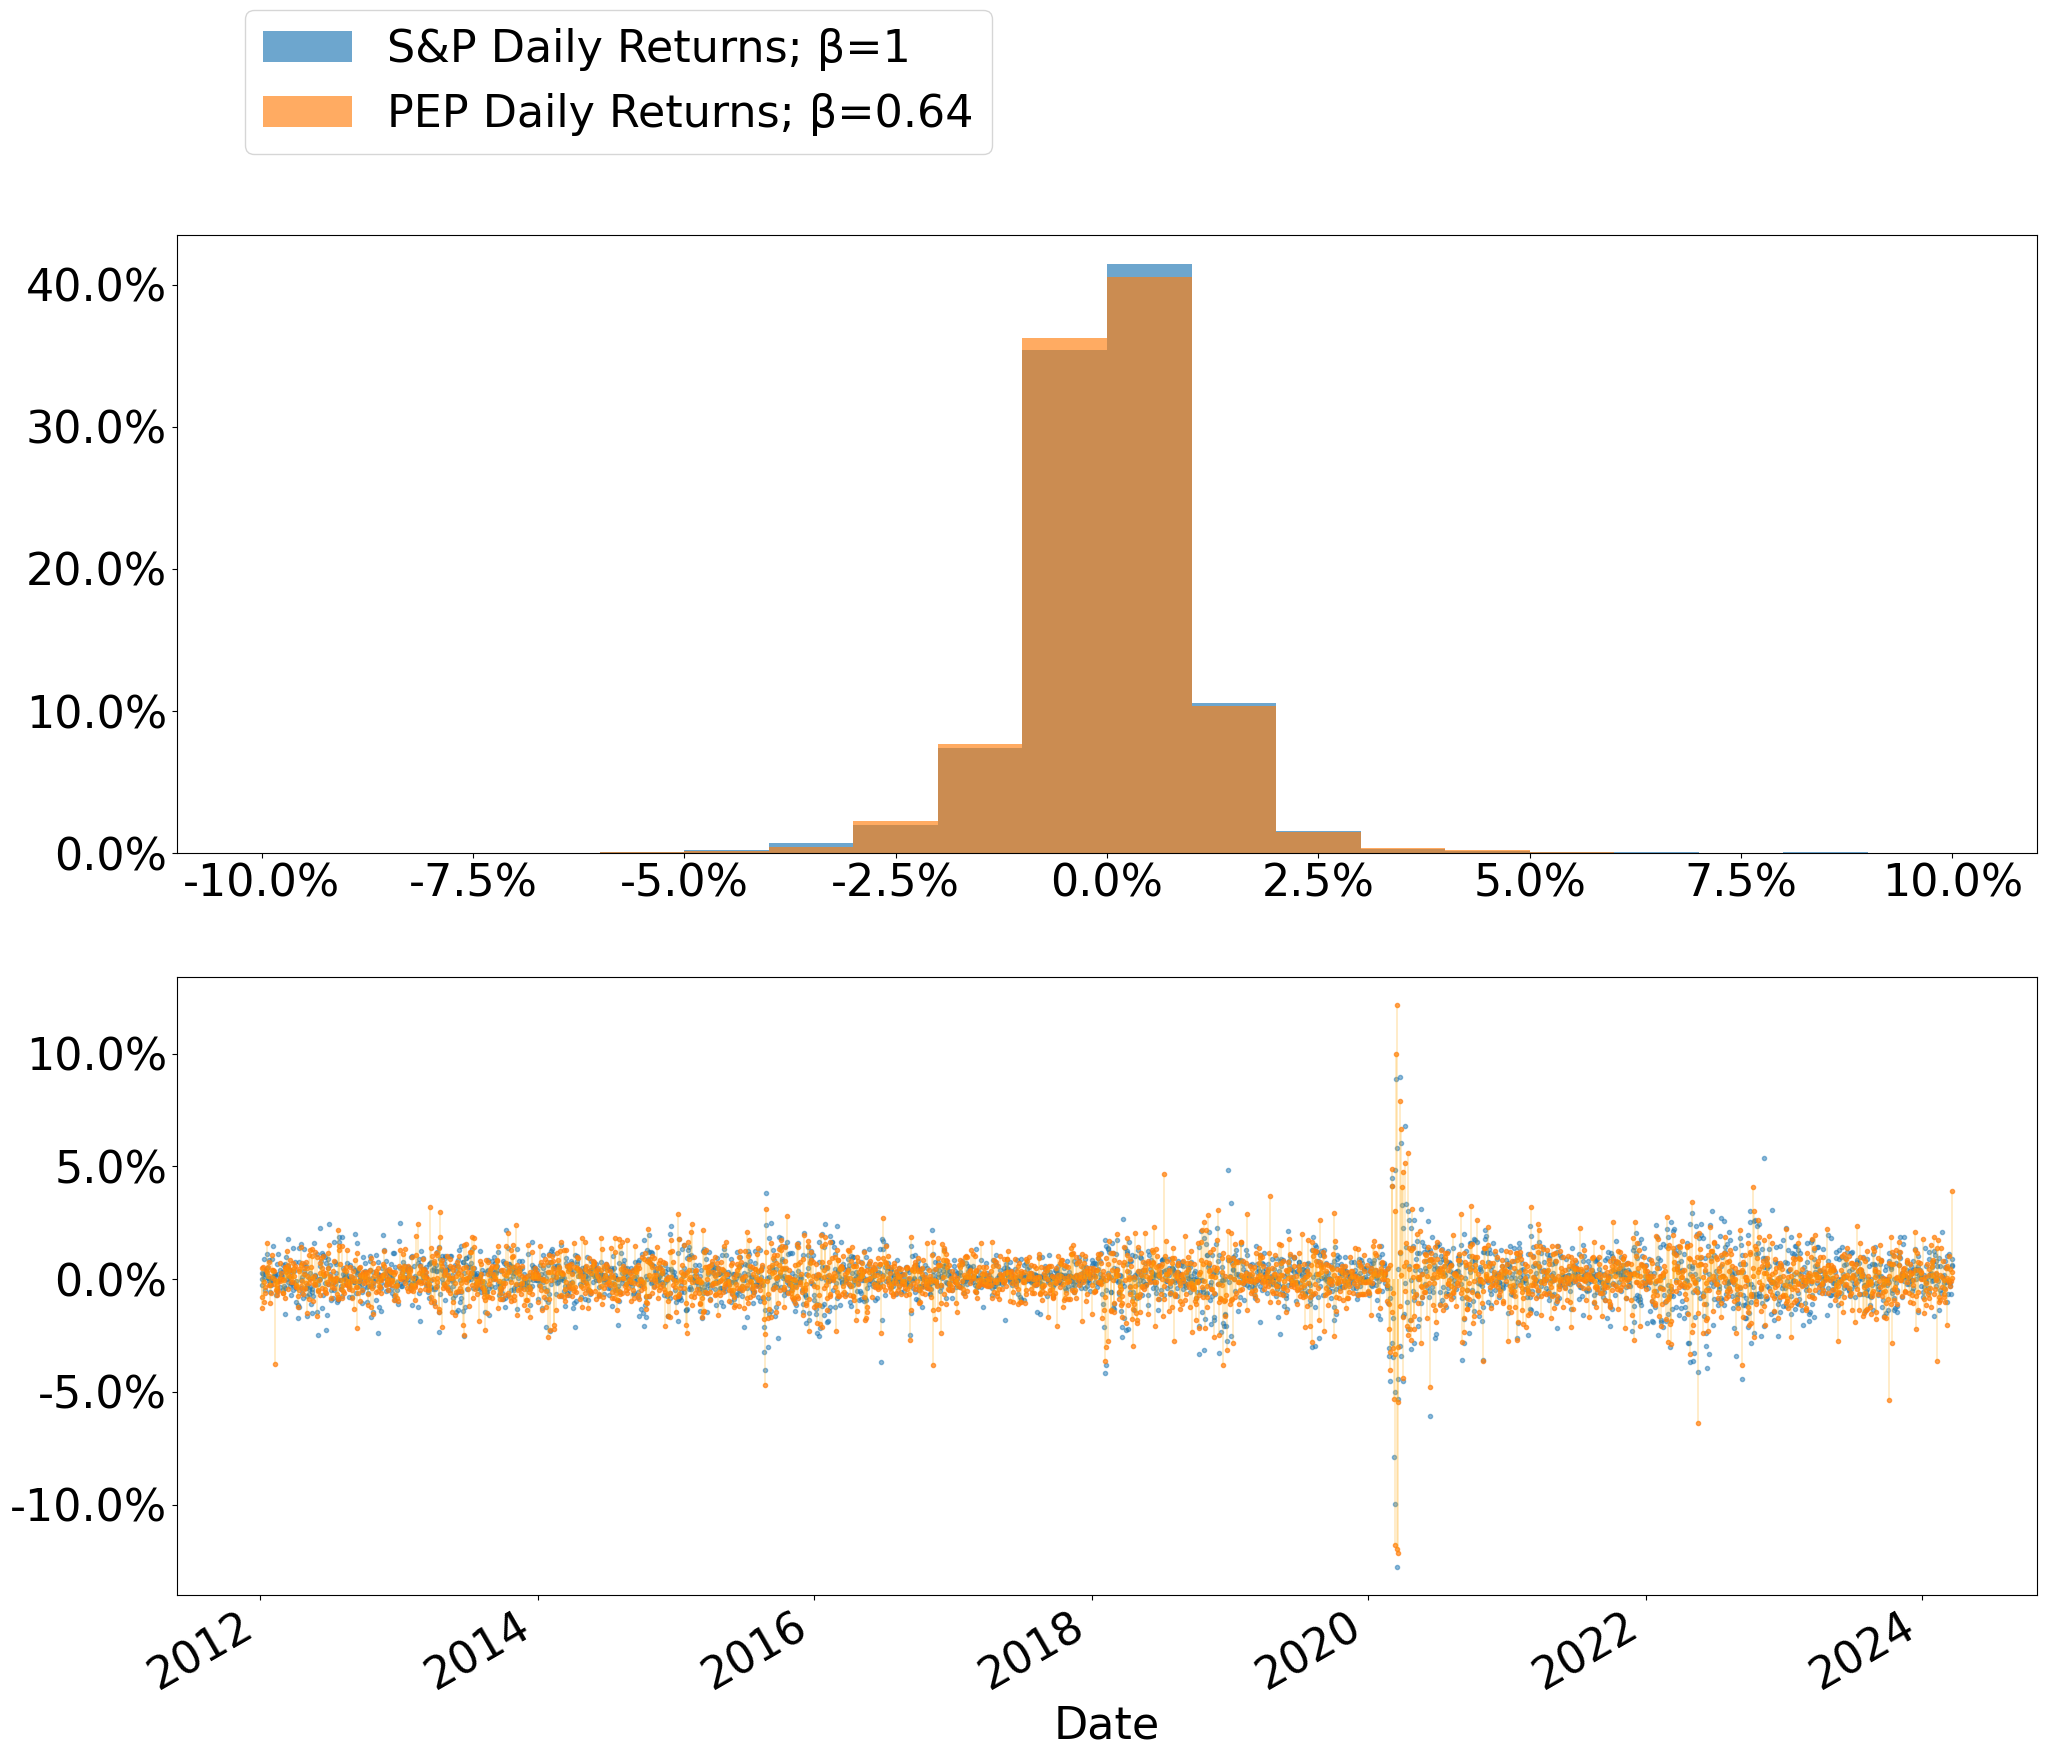

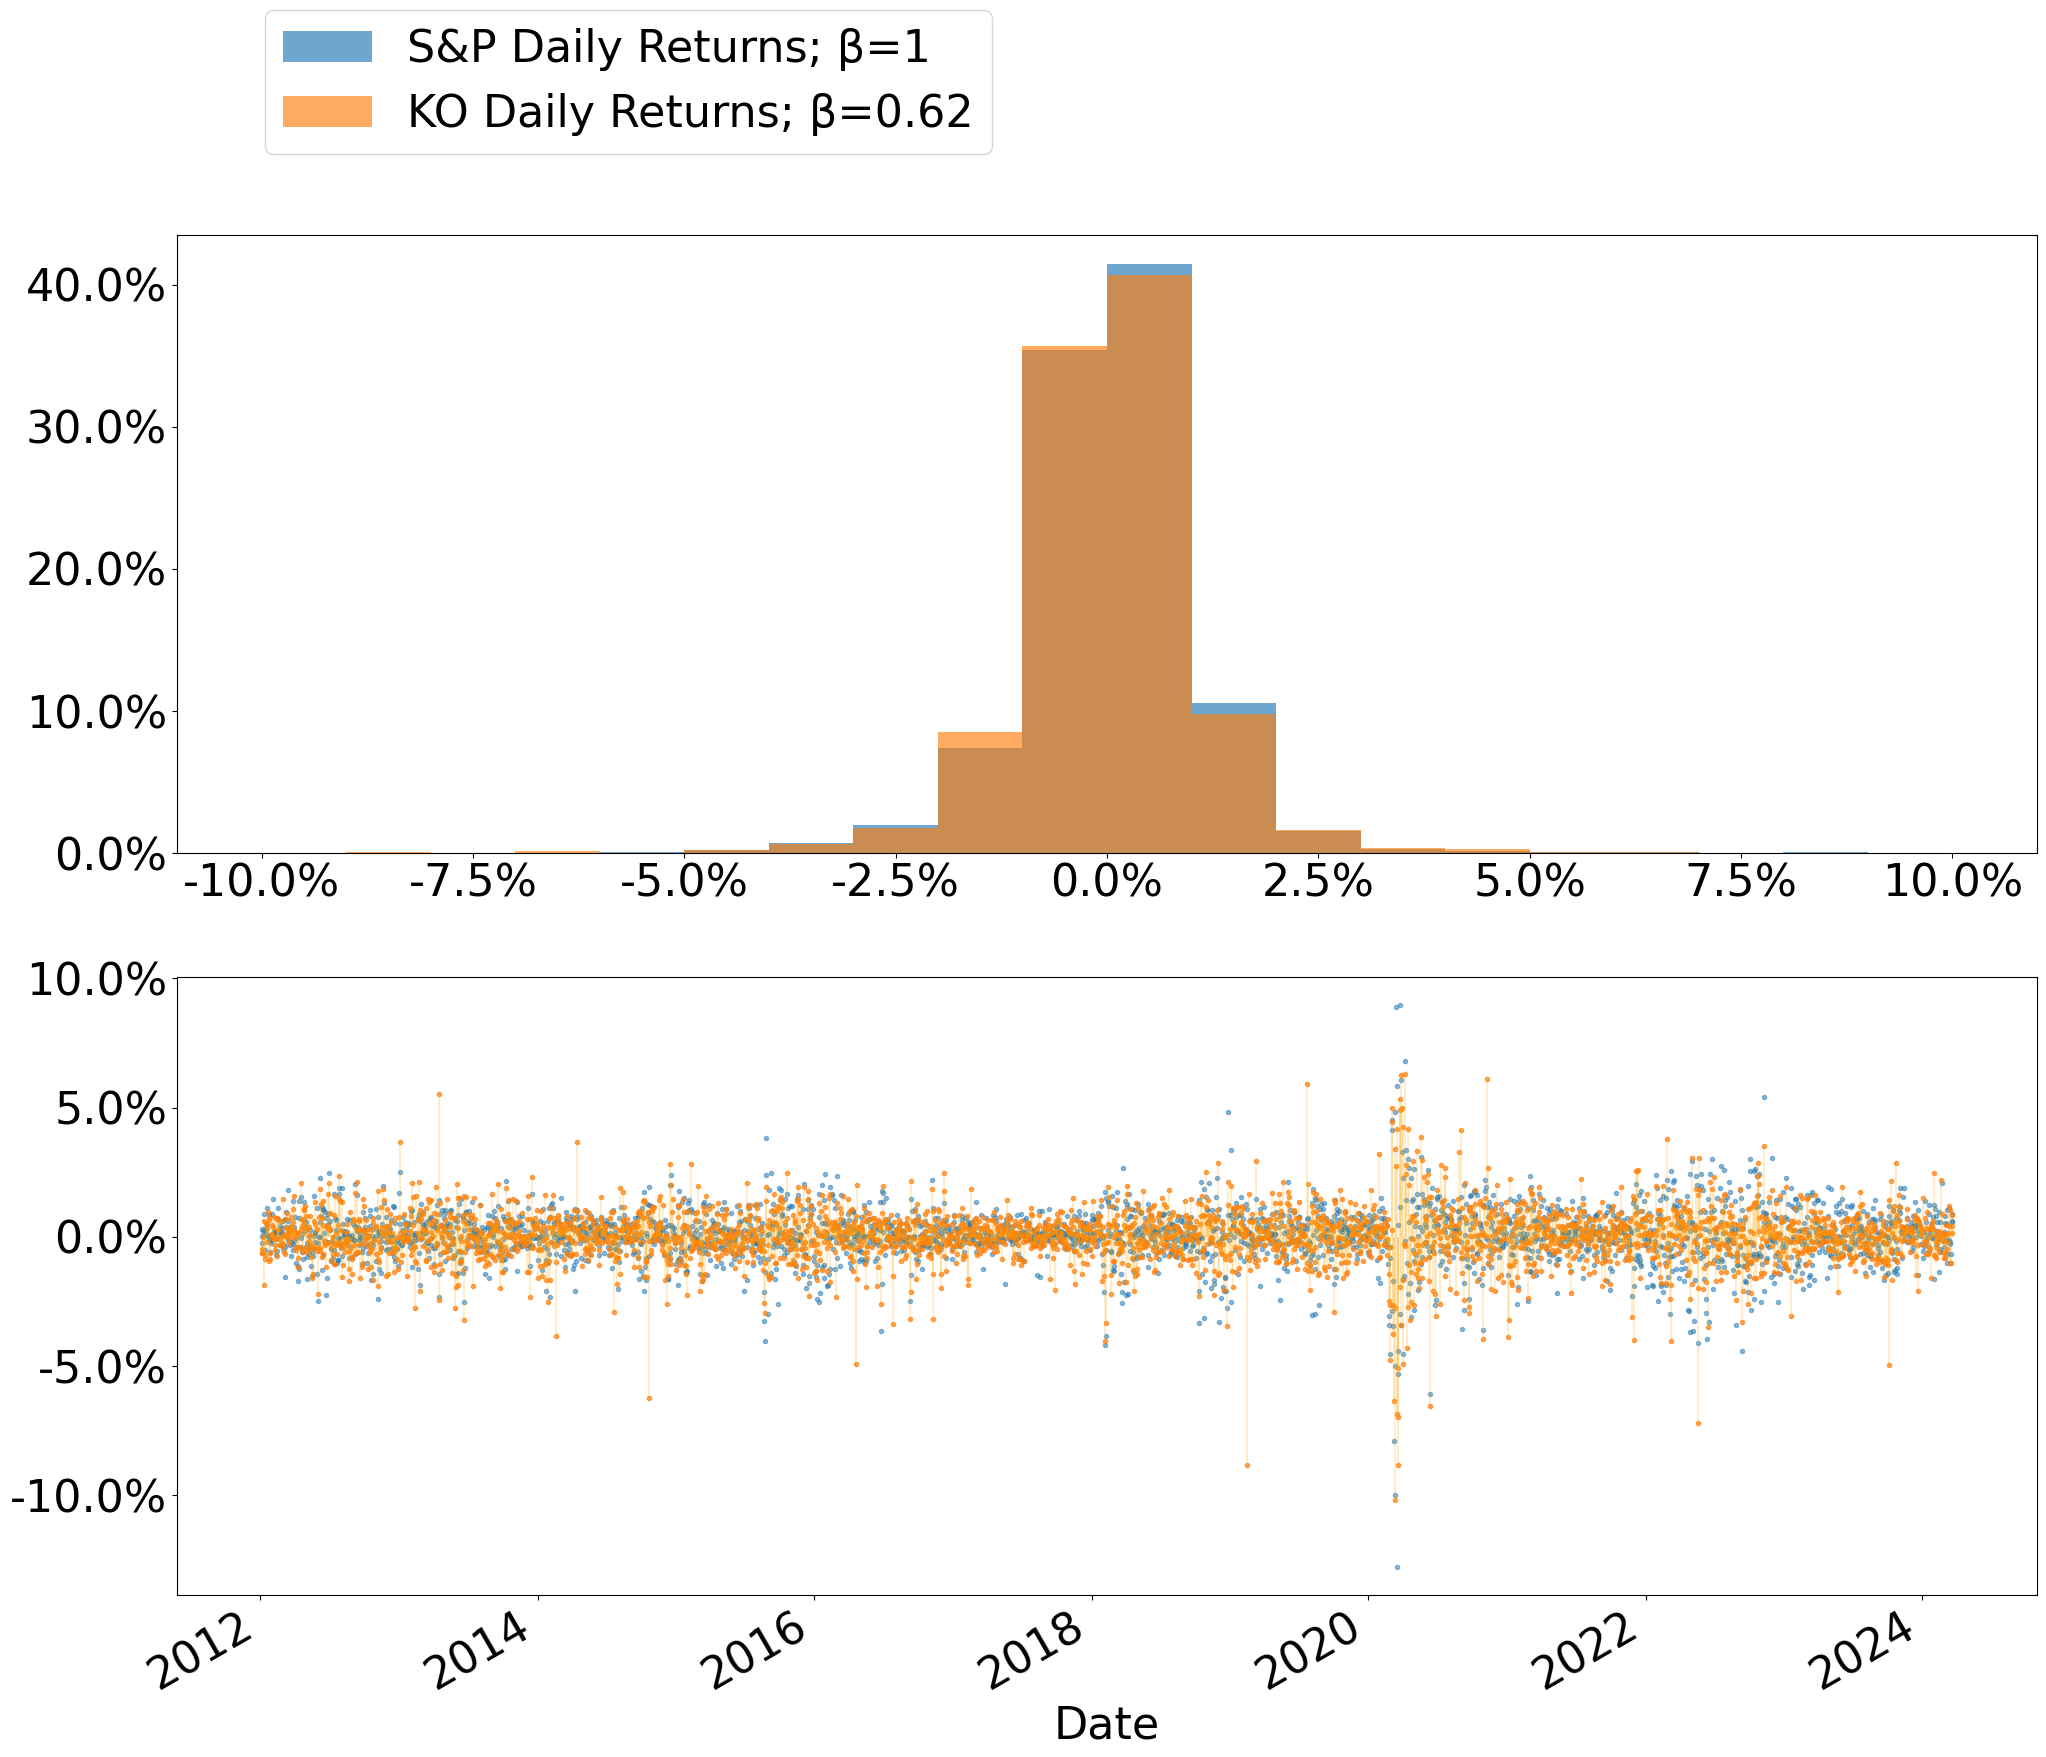

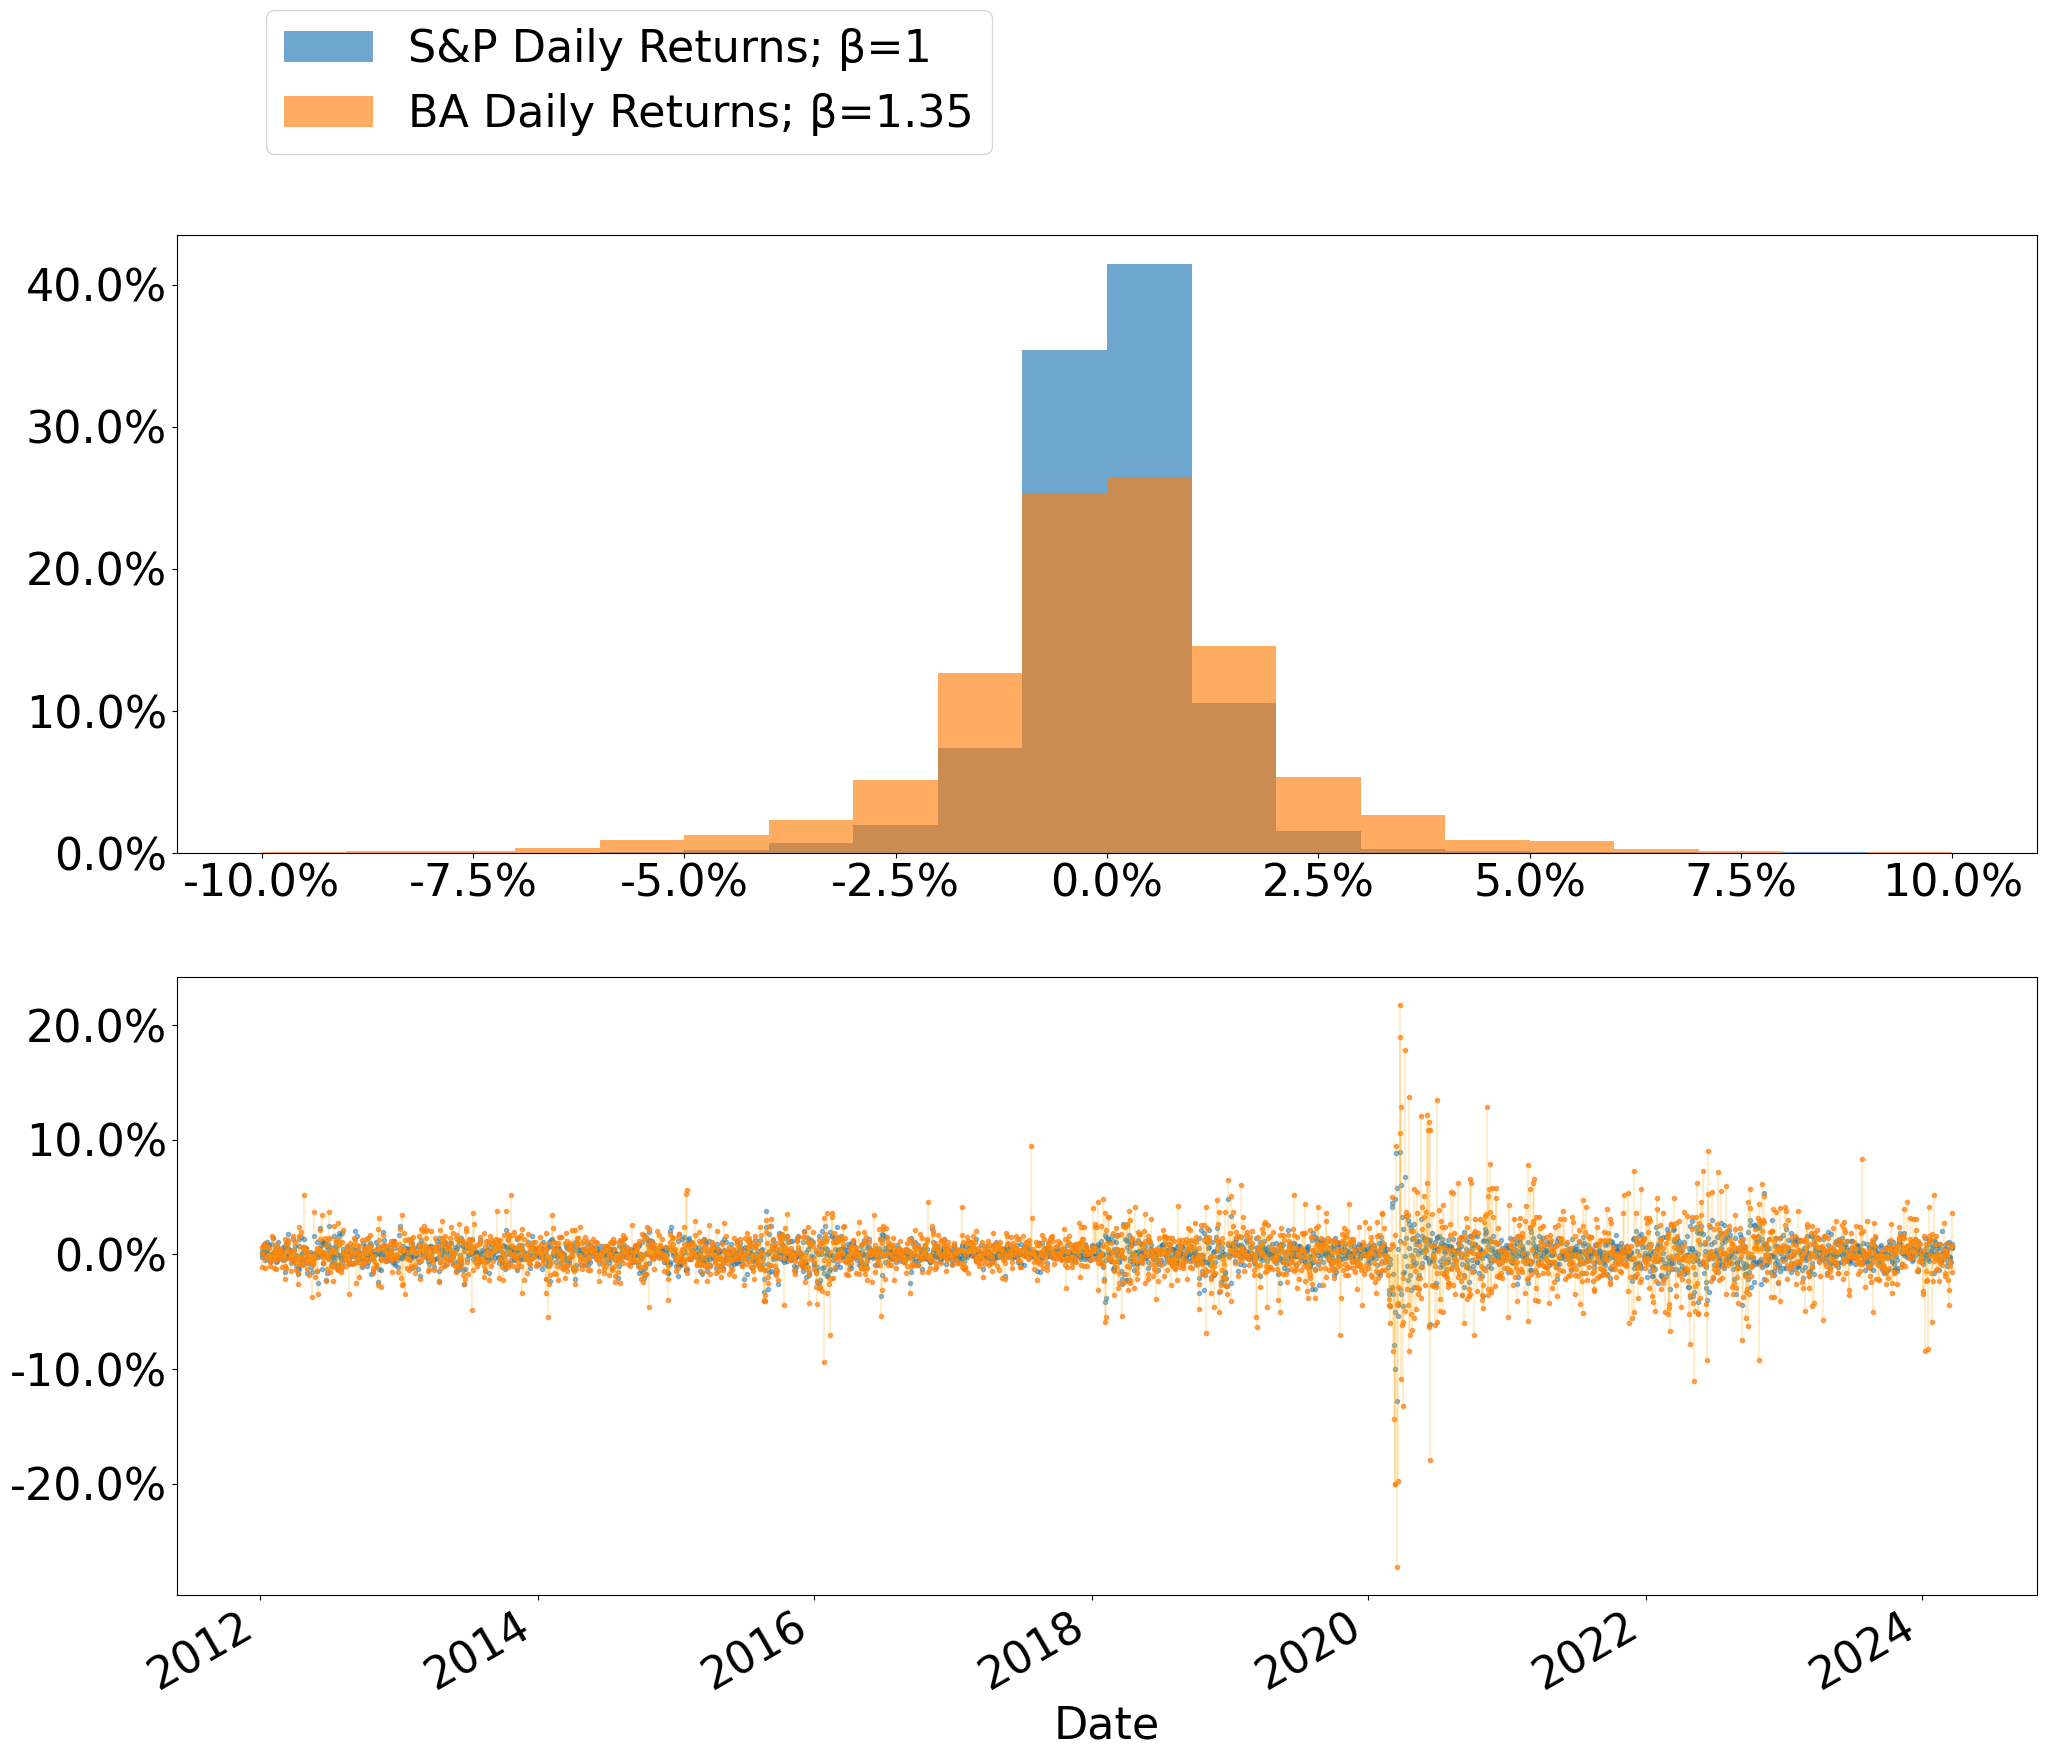

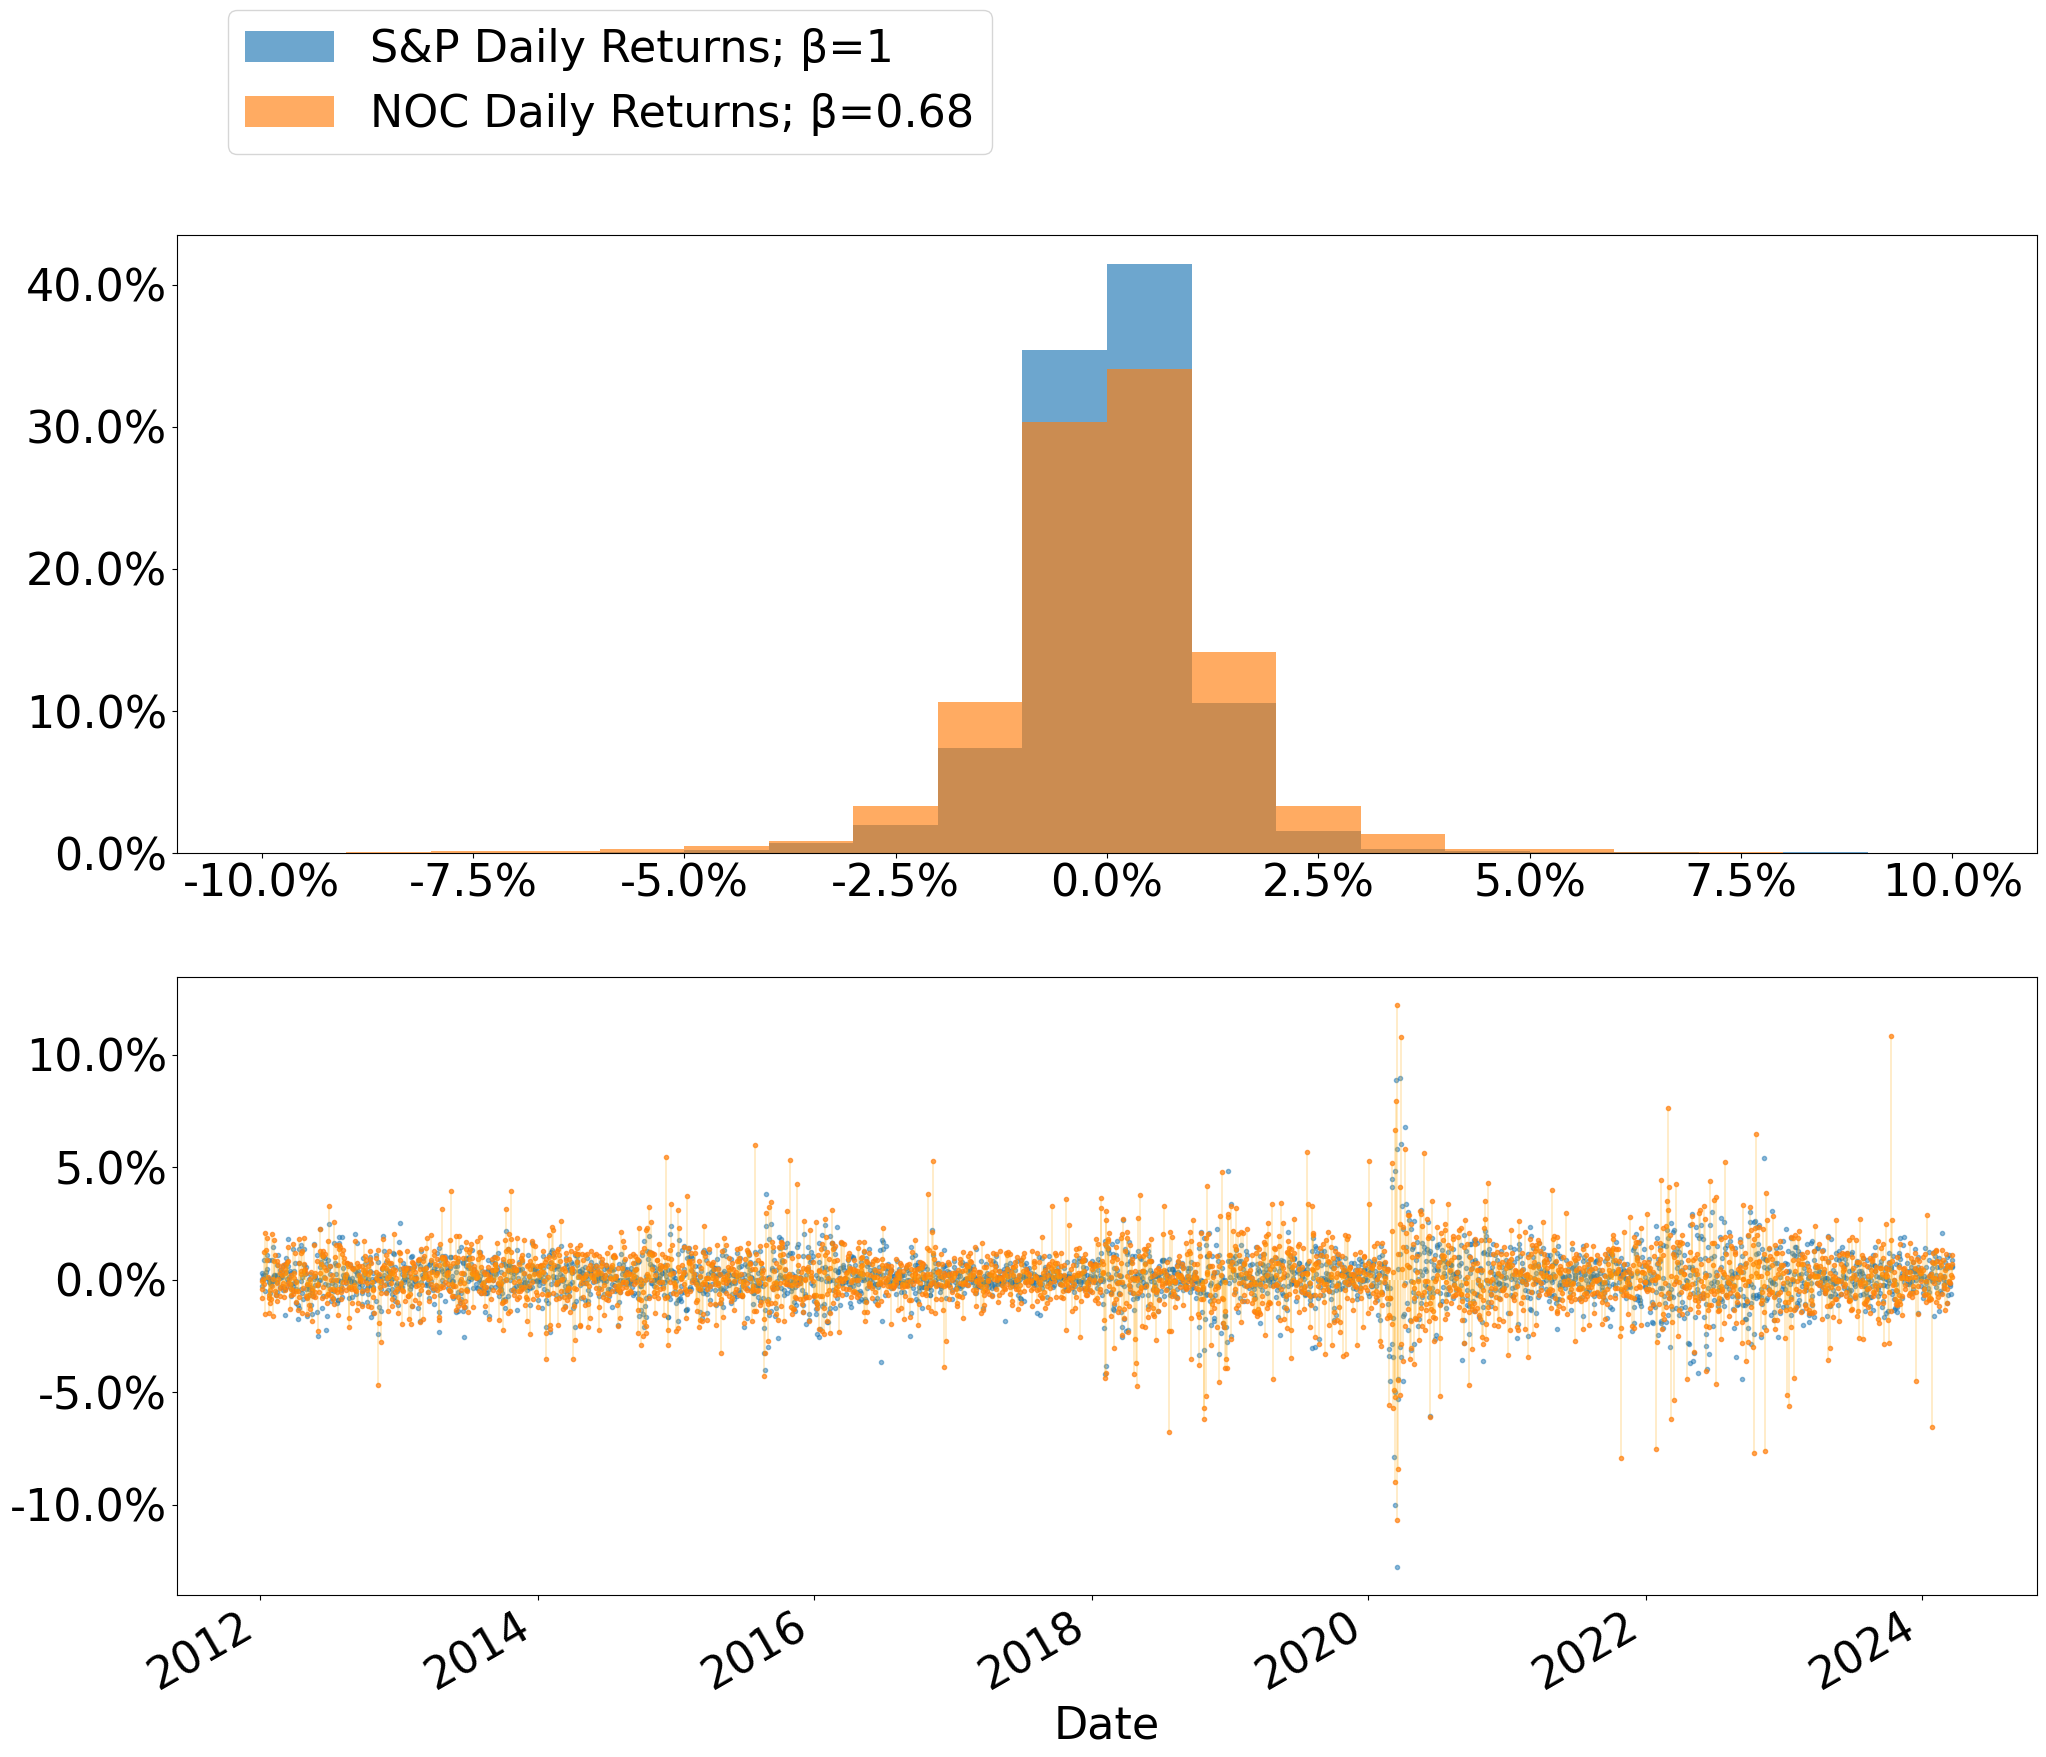

In [66]:
for stock in stocks:
    fig, ax = plt.subplots(2,1, figsize=(24,20))

    price_change_data["S&P500"].hist(bins=[i for i in range(-10, 11,1)],
                      label= "S&P Daily Returns; β="+str(1),
                      ax=ax[0],
                      density=True,
                      grid=False,
                      alpha=.65)
    price_change_data[stock].hist(bins=[i for i in range(-10, 11,1)],
                   label= stock + " Daily Returns; β="+str(betas[stock].round(2)),
                   ax=ax[0],
                   density=True,
                   grid=False,
                   alpha=.65)    

    ax[0].legend(bbox_to_anchor = (.45,1.4))
    ax[0].set_xticklabels([str(x) + "%" for x in ax[0].get_xticks()])
    ax[0].set_yticklabels([str(round(y * 100,2)) + "%" for y in ax[0].get_yticks()])
    
    price_change_data["S&P500"].plot(linestyle='',
                  marker='o',
                  alpha=.5,
                  ms=3,
                  label= "S&P500 Weekly Returns",
                  c="C0",
                ax = ax[1])
    price_change_data[stock].plot(linestyle='',
                  marker='o',
                  alpha=.7,
                  ms=3,
                  label= stock + " Weekly Returns",
                  c="C1",
                ax = ax[1])

    ax[1].vlines(price_change_data.index, 0, price_change_data[stock].values, lw=0.3, color='orange')
    ax[1].set_yticklabels([str(y) + "%" for y in ax[1].get_yticks()])

    
#     ax.set_xbound(lower = -.2, upper = .2)